# Convolutional Neural Networks

Vamos a clasificar imágenes de personajes de la conocida serie de los Simpsons.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://i.imgur.com/i8zIGqX.jpg" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en imágenes de personajes de los Simpsons extraídas directamente de capítulos de la serie. Este dataset ha sido recopilado por [Alexandre Attia](http://www.alexattia.fr/) y es más complejo que el dataset de Fashion MNIST que hemos utilizado hasta ahora. Aparte de tener más clases (vamos a utilizar los 18 personajes con más imágenes), los personajes pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros personajes en pantalla (si bien el personaje a clasificar siempre aparece en la posición predominante).

El dataset de training puede ser descargado desde aquí:

[Training data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60) (~500MB)

Por otro lado, el dataset de test puede ser descargado de aquí:

[Test data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8) (~10MB)

Antes de empezar la práctica, se recomienda descargar las imágenes y echarlas un vistazo.


## Carga de los datos

In [ ]:
import cv2
import os
import numpy as np 
import keras
import matplotlib.pyplot as plt
import glob


# Primero, bajamos los datos de entrenamiento
keras.utils.get_file(fname="simpsons_train.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60")

# Descomprimimos el archivo
!tar -xzf /root/.keras/datasets/simpsons_train.tar.gz -C /root/.keras/datasets

# Hacemos lo mismo con los datos de test
keras.utils.get_file(fname="simpsons_test.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8")
!tar -xzf /root/.keras/datasets/simpsons_test.tar.gz -C /root/.keras/datasets

10665984/10658925 [==============================] - 2s 0us/step


In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Utilizamos sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 64

In [ ]:
def load_train_set(dirname, map_characters, verbose=True):
    """Esta función carga los datos de training en imágenes.
    
    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.
    
    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas
     
    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():        
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

In [ ]:
def load_test_set(dirname, map_characters, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)


In [ ]:
# Cargamos los datos. Si no estás trabajando en colab, cambia los paths por
# los de los ficheros donde hayas descargado los datos.
DATASET_TRAIN_PATH_COLAB = "/root/.keras/datasets/simpsons"
DATASET_TEST_PATH_COLAB = "/root/.keras/datasets/simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_t, y_t = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


## Análisis preliminar de los datos

Como en todo trabajo relativo a la ciencia de datos, es necesario realizar un estudio preliminar de los datos en bruto.

En tanto que este entregable versa sobre clasificación de imágenes mediante redes neuronales, deberemos seguir los siguientes pasos:
* Normalización de los datos
 * Este paso es clave, ya que las redes neuronales necesitan un input normalizado. Esto se debe a la particularidad del algoritmo backpropagation, el cual define un parámetro lambda común para todos los inputs que representa el movimiento del gradiente en dicha dirección.
 * Si no se normalizaran los datos y contasemos con variables en diferentes escalas, algunas variables necesitarían que dicho parámetro fuera pequeño y otras variables que fuese grandes. Al ser este parámetro único no sería capaz de ajustarse a las particularidades de todas la variables.
* Permutación de los datos
 * Como se comenta en el propio enunciado, en tanto que vamos a hacer uso de un conjunto de validación durante el entrenamiento, debemos mezclar los datos para que las muestras de train y validación sean lo más homogéneas posibles.
* Visualización de las imágenes
 * Antes de construir la red, es importante conocer los datos con los que se va a trabajar. Para ello, al estar trabajando con imágenes, una buena opción es visualizar unas cuantas de ellas.
 * De esta manera y, concretamente en este caso, se podrá observar la calidad que tienen las imágenes de los personajes. Es decir, puede ocurrir que alguno de ellos aparezca frecuente en imágenes en las que aparece un poco recortado u oculto, y esto posiblemente repercutirá en los resultados de la red al reconocer dicho personaje.
* One hot encoding
 * El input que debe tomar la red neuronal ha de ser un vector. Puesto que los datos de entrada se encuentran en formato numérico, se debe hacer one hot sobre ellos para obtener el vector que se le dará posteriormente a la red.
* Análisis exploratorio de los datos
 * Tamaño de las imágenes. Es necesario ya que el input de la primera capa de la red convolucional ha de coincidir con la dimensión de las imágenes. 
 * Número de muestras en el conjunto de entrenamiento y de test. Necesario para comprobar que tenemos la proporción correcta entre estos conjuntos. 



In [ ]:
# Normalizamos
X = X / 255.0
X_t = X_t / 255.0

In [ ]:
# Vamos a barajar aleatoriamente los datos. Esto es importante ya que si no
# lo hacemos y, por ejemplo, cogemos el 20% de los datos finales como validation
# set, estaremos utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

In [ ]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

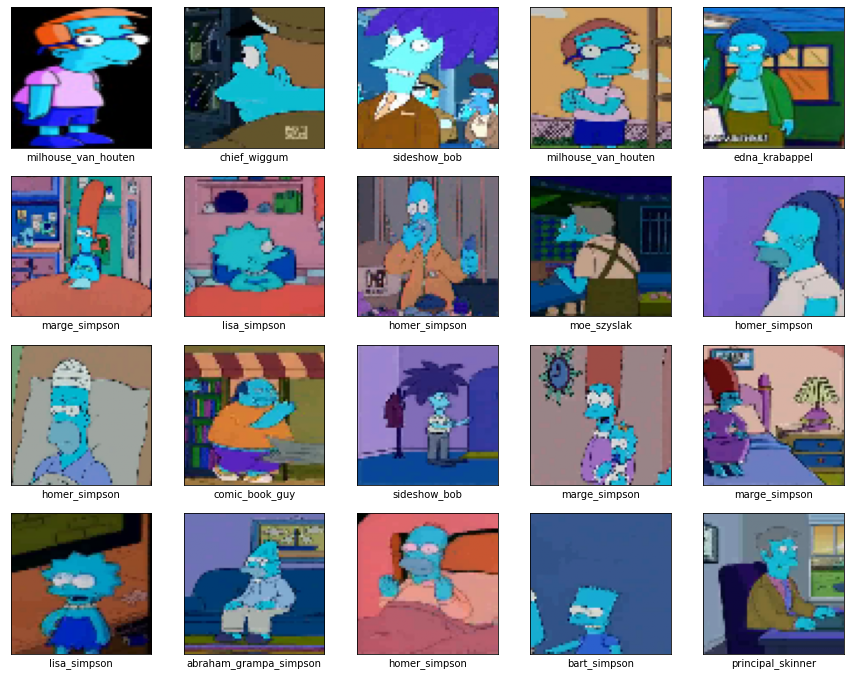

In [ ]:
plt.figure(figsize=(15,15))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X[i])
  plt.xlabel(MAP_CHARACTERS[y[i]])
plt.show()

In [ ]:
import numpy as np

def one_hot_encoder(y):
  y_one_hot_full = []
  y_one_hot = np.zeros(18, dtype = int)

  for label in y:
    y_one_hot_aux = y_one_hot.copy()
    y_one_hot_aux[label] = 1
    y_one_hot_full.append(y_one_hot_aux)
  y_one_hot_full = np.array(y_one_hot_full)
  return y_one_hot_full

In [ ]:
y = one_hot_encoder(y)
y_t_escalar = y_t
y_t = one_hot_encoder(y_t)

A continuación realizamos un breve análisis exploratorio de los datos: conteos del volumen de train y test. Además, sabemos que las imágenes han sido normalizadas a un tamaño de 64x64.

In [ ]:
print("Número de imágenes en el conjunto de entrenamiento --> ", len(X))
print("Número de imágenes en el conjunto de entrenamiento --> ", len(X_t))

Número de imágenes en el conjunto de entrenamiento -->  18992
Número de imágenes en el conjunto de entrenamiento -->  890


## Utils
En esta sección se encuentran funciones que se utilizarán a lo largo del trabajo.

In [ ]:
import matplotlib
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
import pandas as pd

def calcular_metricas_cat(real, predicted):
  
    """
    Se necesita que el real (y_t) esté en versión escalar, no vectorial
    Se debe usar y_t_escalar 
    """
    cnf_matrix = confusion_matrix(real, predicted)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(
        cnf_matrix,
        fmt='.4g',
        annot = True,
        annot_kws={'size': 16},
        cmap= 'bwr',
        cbar = True)
    ax.xaxis.set_label_position('top')
    posibles_clases = ['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson',
                                                'charles_montgomery_burns', 'chief_wiggum','comic_book_guy',
                                                 'edna_krabappel', 'homer_simpson', 'kent_brockman',
                                                 'krusty_the_clown', 'lisa_simpson', 'marge_simpson',
                                                 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders',
                                                 'nelson_muntz', 'principal_skinner','sideshow_bob' ]
    pos, textvals = plt.yticks(np.arange(18)+0.5, posibles_clases, 
                               rotation=0, va='center')
    
    pos, textvals = plt.xticks(np.arange(18)+0.5, posibles_clases, 
                               rotation=90, va=  'top' )
    xlabels = posibles_clases
    ylabels = posibles_clases
    plt.title('Matriz de confusión')
    plt.ylabel('Clase actual')
    plt.xlabel('Clase de predicción')
    plt.show()
    
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)


    prec = metrics.precision_score(real, predicted,average='micro')
    rec = metrics.recall_score(real, predicted,average='micro')
    

    print("Precisión: {}".format(prec))
    print("Recall: {}".format(rec))    
    
    return prec,rec
    

def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

def plot_confusion_matrix(real, predicted):
  """
  Se necesita que el real (y_t) esté en versión escalar, no vectorial
  Se debe usar y_t_escalar 
  """
  target_names = [v for k,v in MAP_CHARACTERS.items()]
  report = classification_report(real, predicted, target_names=target_names, output_dict=True)
  plt.figure(figsize=(8, 10))
  sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

matplotlib.rcParams['figure.figsize'] = [16, 8]

## Diversos modelos CNN para realizar la clasifación multiclase
Para cada modelo se llevarán a cabo los siguientes pasos:
* Desarrollo del modelo, argumentando la motivación de las decisiones tomadas relativas a la arquitectura, forma de entrenamiento, etc ..
* Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
* Análisis de resultados, obtención de métricas de precision y recall por clase y análisis de qué clases obtienen mejores o peores resultados.
  * Asímismo se graficarán la accuracy y el loss del modelo durante el entrenamiento.
* Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas a nuestro modelo?

No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import os
import sys
import tarfile
import numpy as np

### Base model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

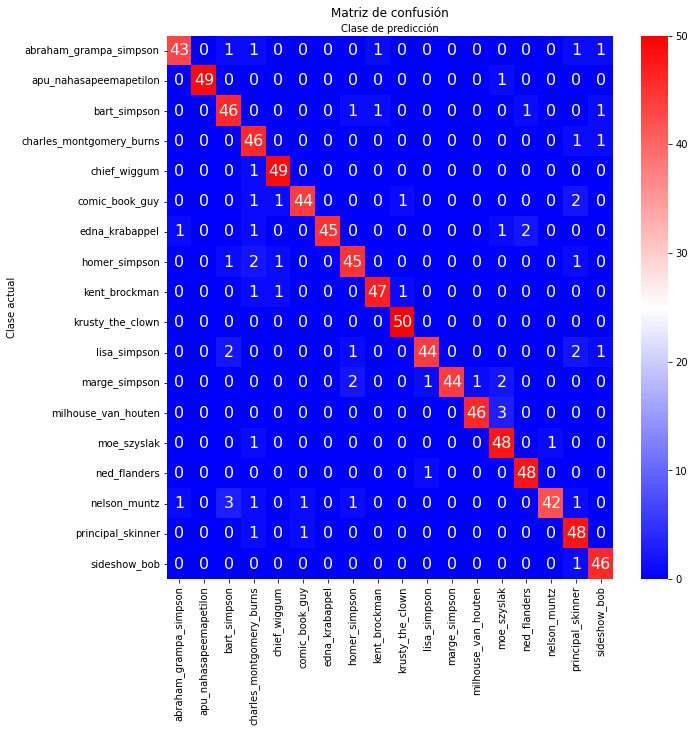

Precisión: 0.9325842696629213
Recall: 0.9325842696629213


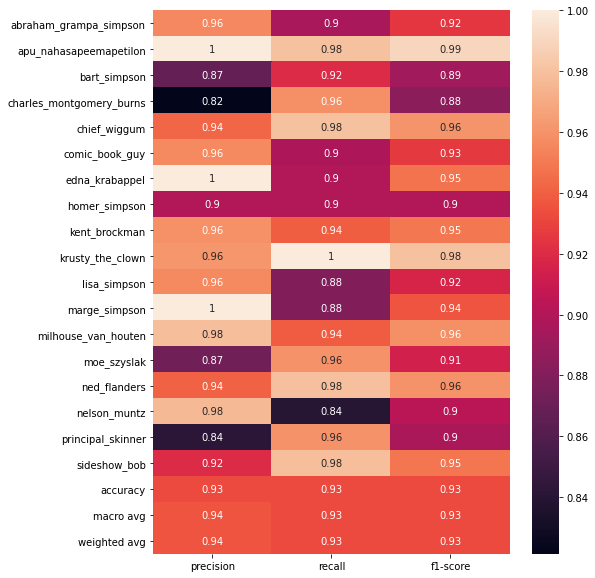

In [ ]:
# Base model 
# mucho overfitting, justificar con slide 14 (muchos parámetros)
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(18))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())
history = model.fit(X, y, epochs=20, batch_size = 64,verbose=1, validation_split = 0.2)
predicted_classes = np.argmax(model.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

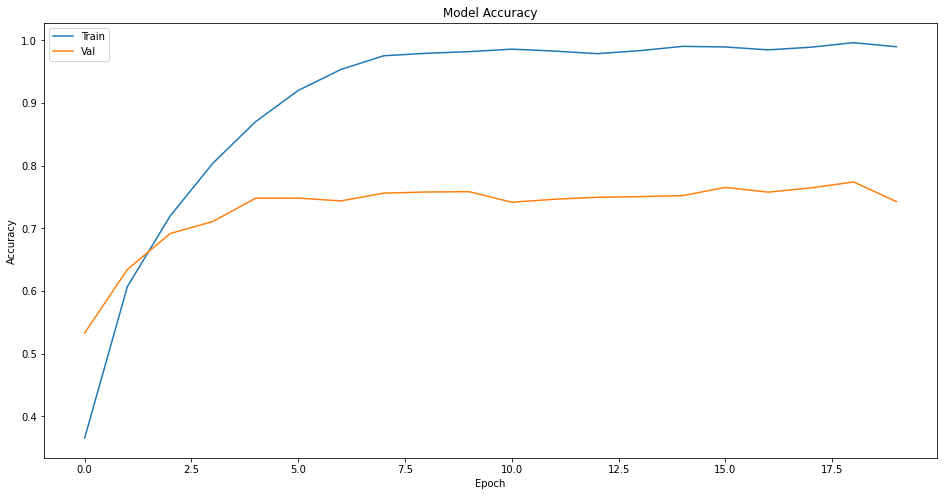

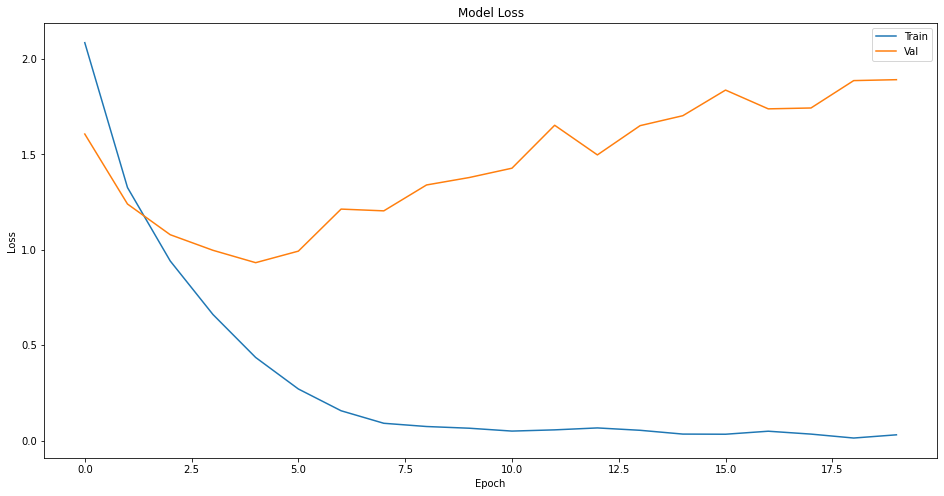

In [ ]:
plot_acc(history)
plot_loss(history)

### CNN1 - Modelo sin capas max pooling

Como podemos observar, al quitar las capas max pooling el numero de parámetros a entrenar es extremadamente elevado, concretamente 13.754.202 con lo cual se acentúa muchísimo el overfitting. Aún añadiendo capas de Dropout y más capas Dense es imposible corregir este efecto debido a que no se realiza ninguna reducción de la dimensionalidad tras las capas de convolución. 

#### CNN1 - Versión intermedia.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_5 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 58, 58, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 215296)            0         
_________________________________________________________________
dropout (Dropout)            (None, 215296)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

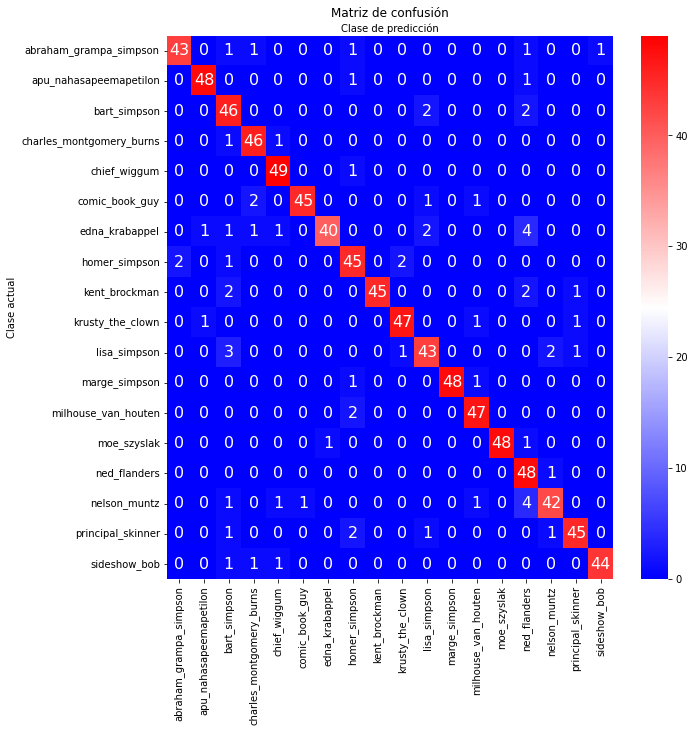

Precisión: 0.9202247191011236
Recall: 0.9202247191011236


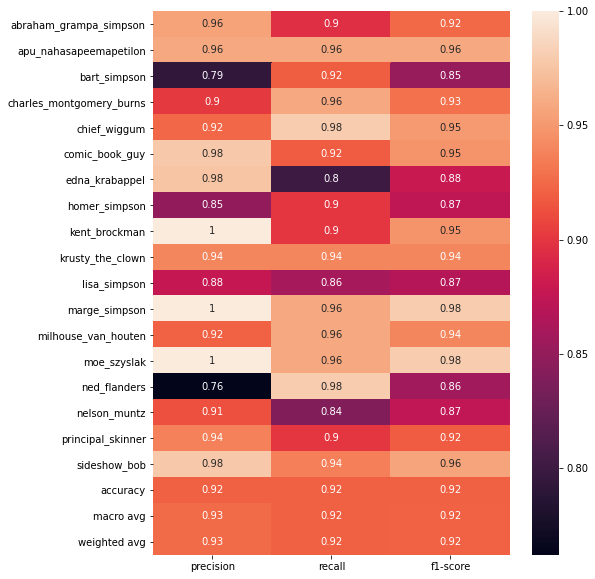

In [ ]:
model_1_1 = Sequential()
model_1_1.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3))) # 64 activation maps con un filtro de 5x5x3 
model_1_1.add(Activation('relu'))

model_1_1.add(Conv2D(64, (3, 3))) # 32 activation maps con un filtro de 5x5x64
model_1_1.add(Activation('relu'))


model_1_1.add(Flatten())
model_1_1.add(Dropout(0.25))
model_1_1.add(Dense(128))
model_1_1.add(Activation('relu'))
model_1_1.add(Dense(64))
model_1_1.add(Activation('relu'))
model_1_1.add(Dense(18))
model_1_1.add(Activation('softmax'))
model_1_1.summary()
model_1_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model_1_1.summary())
history_1_1 = model_1_1.fit(X, y, epochs=20, batch_size = 64,verbose=1, validation_split = 0.2)
predicted_classes = np.argmax(model_1_1.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

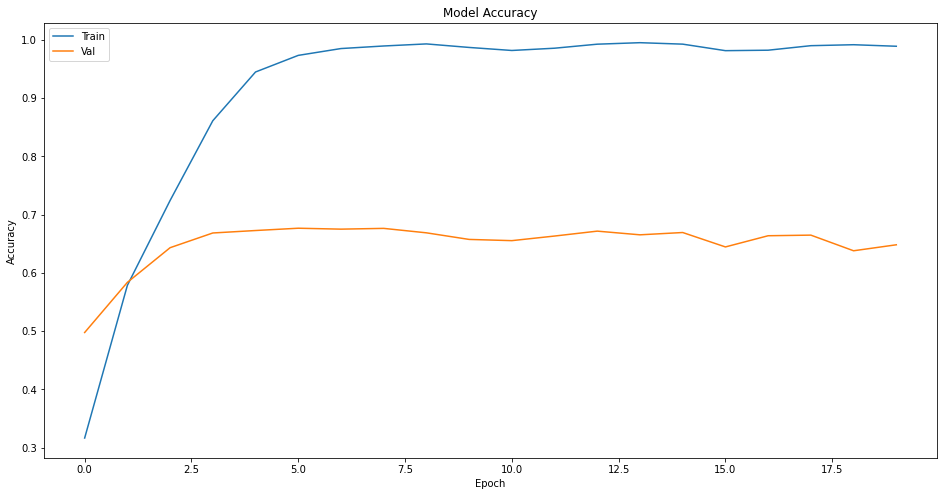

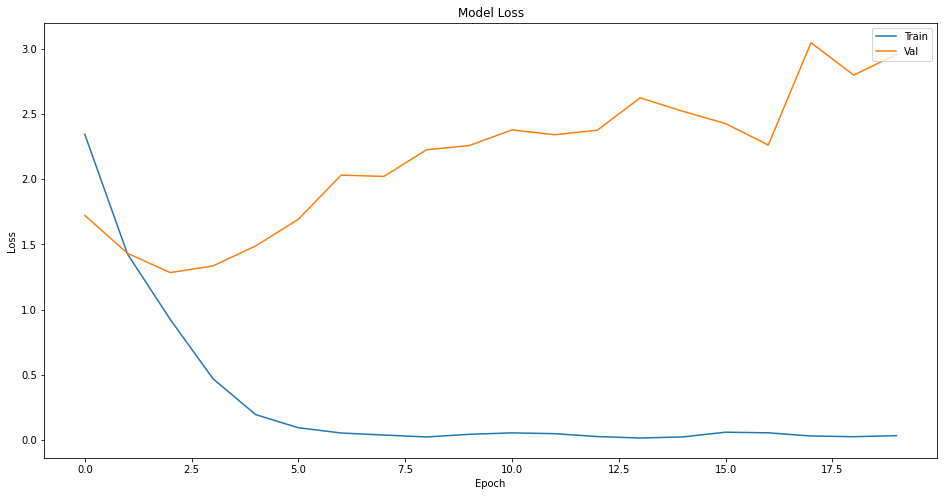

In [ ]:
plot_acc(history_1_1)
plot_loss(history_1_1)

#### CNN1 - Versión final


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 60, 60, 64)        4864      
_________________________________________________________________
activation_10 (Activation)   (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 32)        18464     
_________________________________________________________________
activation_11 (Activation)   (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 57, 57, 16)        2064      
_________________________________________________________________
activation_12 (Activation)   (None, 57, 57, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 51984)            

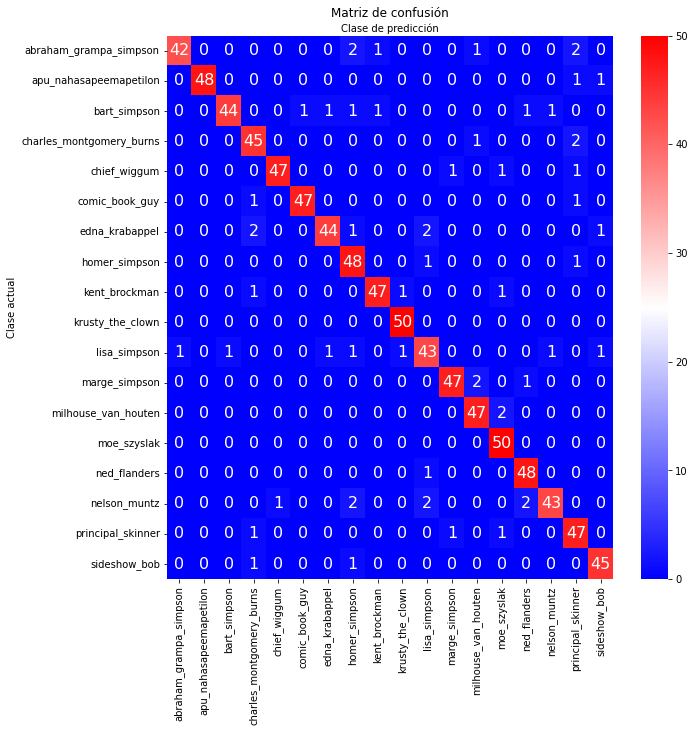

Precisión: 0.9348314606741573
Recall: 0.9348314606741573


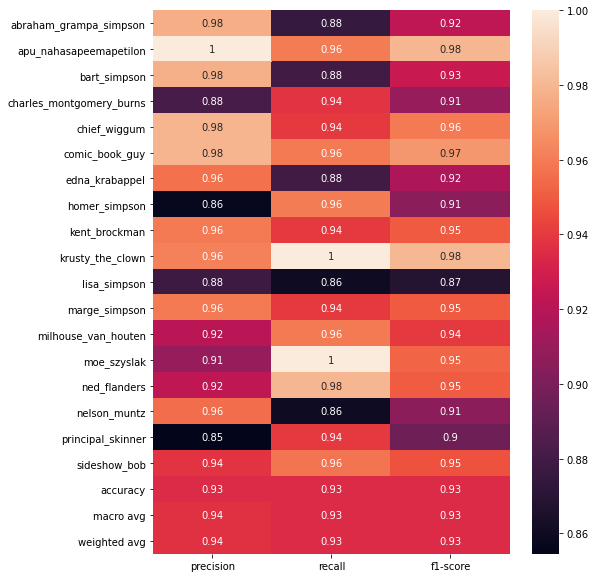

In [ ]:
model_1_2 = Sequential()
model_1_2.add(Conv2D(64, (5, 5), input_shape=(64, 64, 3))) # 64 activation maps con un filtro de 5x5x3 
model_1_2.add(Activation('relu'))

model_1_2.add(Conv2D(32, (3, 3))) # 32 activation maps con un filtro de 5x5x64
model_1_2.add(Activation('relu'))

model_1_2.add(Conv2D(16, (2, 2))) # 16 activation maps con un filtro de 2x2x32
model_1_2.add(Activation('relu'))

model_1_2.add(Flatten())
model_1_2.add(Dropout(0.25))
model_1_2.add(Dense(264))
model_1_2.add(Activation('relu'))
model_1_2.add(Dense(18))
model_1_2.add(Activation('softmax'))
model_1_2.summary()
model_1_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


print(model_1_2.summary())
history_1_2 = model_1_2.fit(X, y, epochs=20, batch_size = 64,verbose=1, validation_split = 0.2)
predicted_classes = np.argmax(model_1_2.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

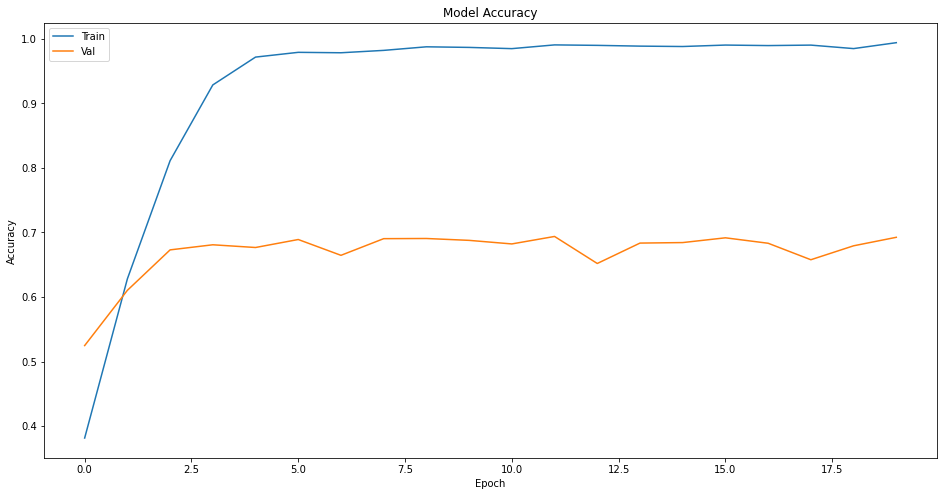

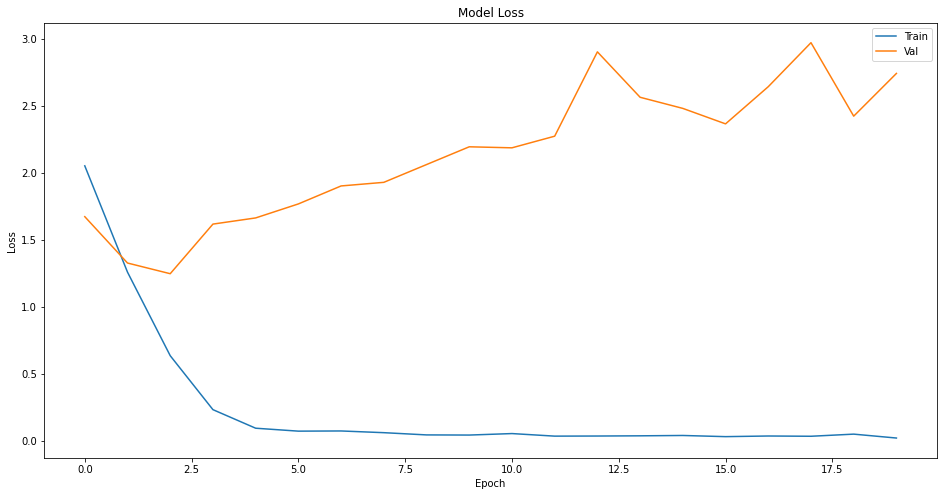

In [ ]:
plot_acc(history_1_2)
plot_loss(history_1_2)

### CNN2 - Reducción del base model

Este modelo parte del base model. Se han utilizado dos capas de max pooling con un número de filtros más reducido, funciones de activación ReLU y una capa Dense. Como se observa, la presecia de overfitting es bastante elevada, esto es debido que el modelo es muy sencillo y no se utilizan técnicas de regulación como Dropout.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 60, 60, 16)        1216      
_________________________________________________________________
activation_15 (Activation)   (None, 60, 60, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)             

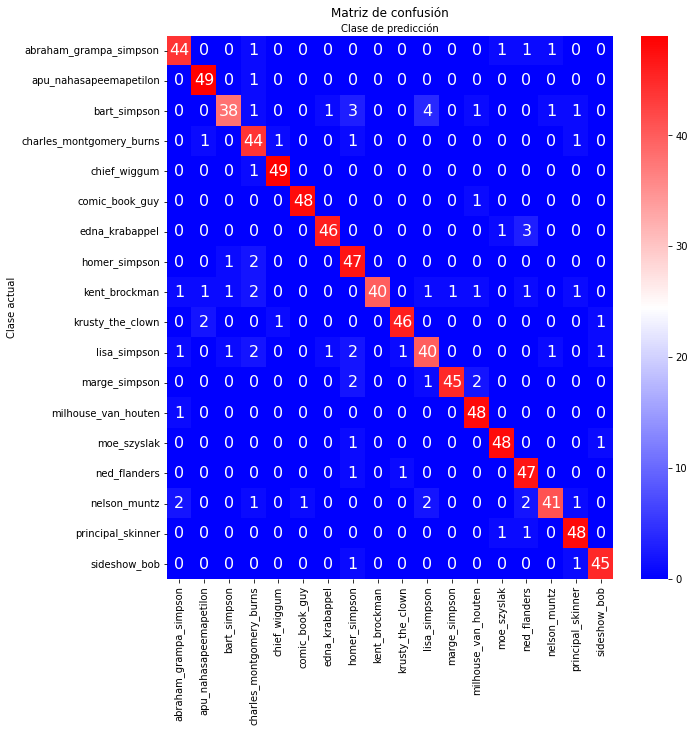

Precisión: 0.9134831460674158
Recall: 0.9134831460674158


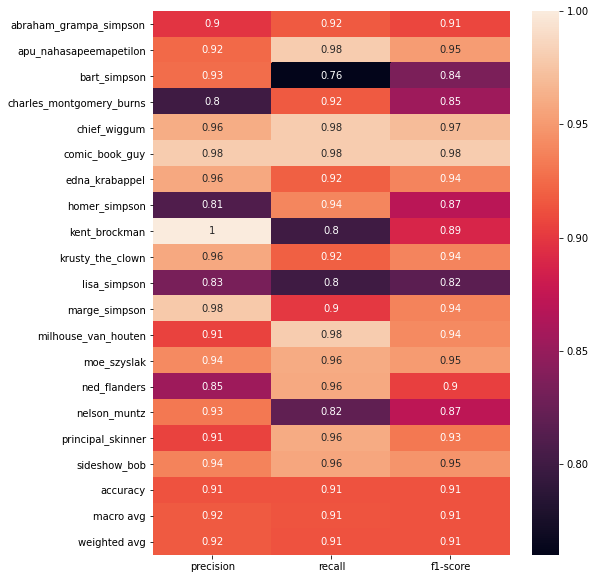

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(16, (5, 5), input_shape=(64, 64, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())

model_2.add(Dense(32))
model_2.add(Activation('relu'))

model_2.add(Dense(18))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model_2.summary())
history_2 = model_2.fit(X, y, epochs=20, batch_size = 64,verbose=1, validation_split = 0.2)
predicted_classes = np.argmax(model_2.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

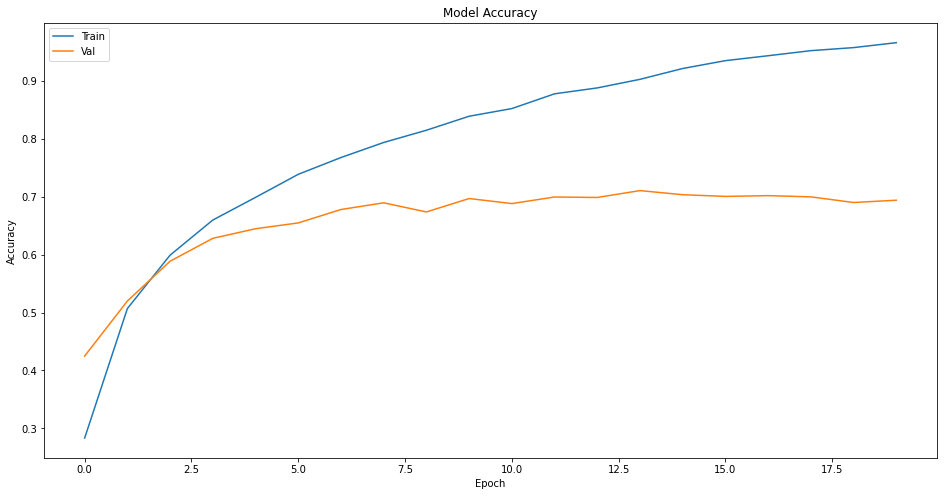

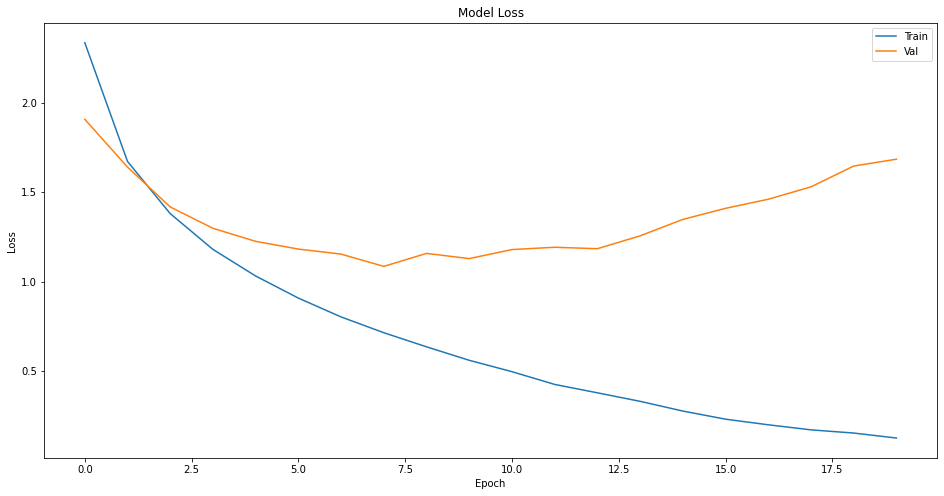

In [ ]:
plot_acc(history_2)
plot_loss(history_2)

### CNN3 - Modelo sin y con dropout.



#### CNN 3. Versión intermedia. Modelo con overfitting

El primer modelo que se presenta se ha construido partiendo del modelo base. Como se puede apreciar, se han utilizado unidades de activación ReLU, Batch normalization y una capa max pooling. A pesar de que la presencia de capas max pooling en un modelo suele ayudar a reducir el overfitting, debido a que no se han añadido técnicas de regularización como podría haber sido dropout, se puede apreciar que el modelo tiene overfitting.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 58, 58, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 58, 64)        256       
_________________________________________________________________
activation_20 (Activation)   (None, 58, 58, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 64)       

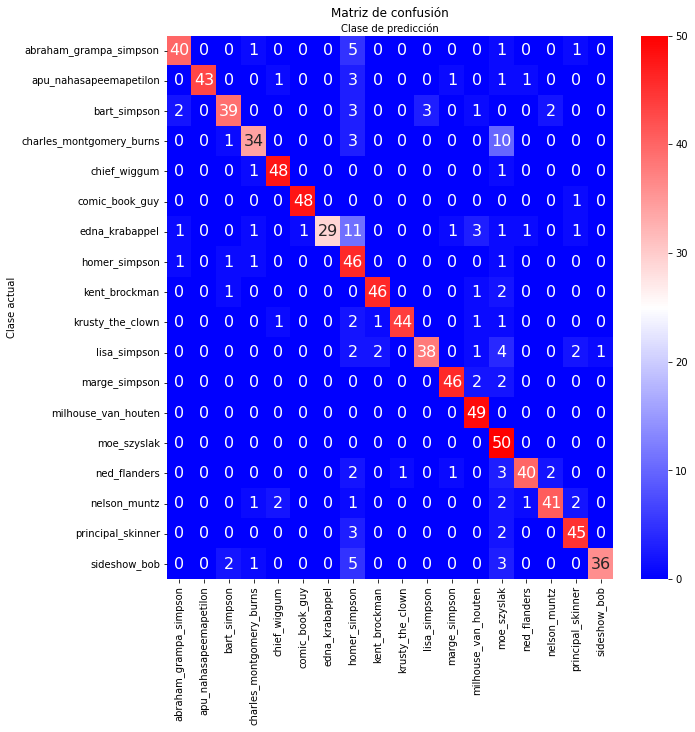

Precisión: 0.8561797752808988
Recall: 0.8561797752808988


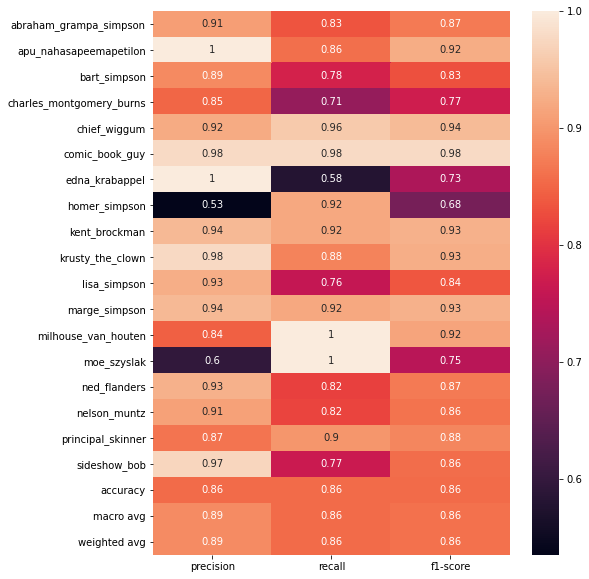

In [ ]:
model_3_1 = Sequential()
model_3_1.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))

model_3_1.add(BatchNormalization())
model_3_1.add(Activation('relu'))

model_3_1.add(Conv2D(64, (3, 3)))
model_3_1.add(BatchNormalization())
model_3_1.add(Activation('relu'))
model_3_1.add(MaxPooling2D(pool_size=(2, 2)))

model_3_1.add(Flatten())
model_3_1.add(Dense(128))
model_3_1.add(Activation('relu'))
model_3_1.add(Dense(64))
model_3_1.add(Activation('relu'))
model_3_1.add(Dense(18))
model_3_1.add(Activation('softmax'))

model_3_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


print(model_3_1.summary())
history_3_1 = model_3_1.fit(X, y, epochs=20, batch_size = 64,verbose=1, validation_split = 0.2)
predicted_classes = np.argmax(model_3_1.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

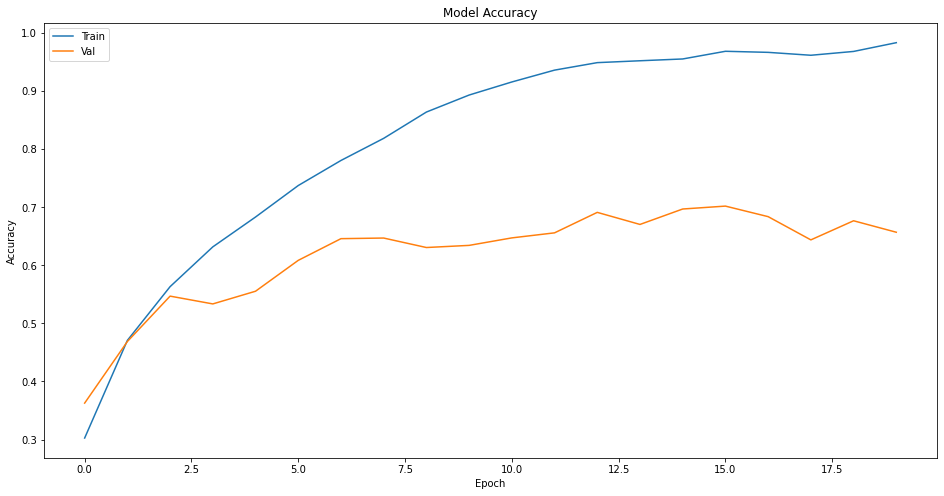

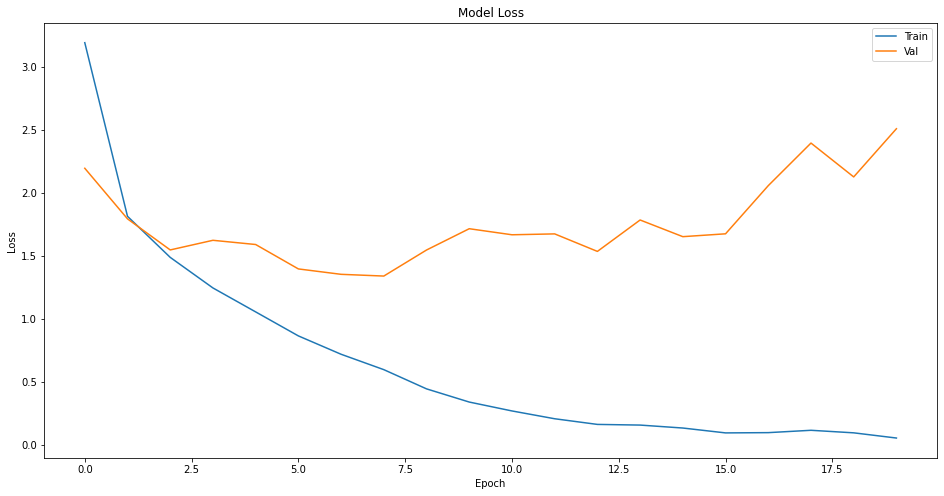

In [ ]:
plot_acc(history_3_1)
plot_loss(history_3_1)

#### CNN3. Versión final. Modelo con técnicas de regularización

Observando la tendencia al overfitting, se ha construido un segundo modelo con una variación mínima, pero añadiendo técnicas de regularización. En este caso, se ha añadido dropout y se ha podido comprobar como el overfitting se ha reducido considerablemente. Además, la capacidad de aprendizaje del modelo ha aumentado. El modelo es el siguiente:


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 60, 60, 16)        1216      
_________________________________________________________________
batch_normalization_2 (Batch (None, 60, 60, 16)        64        
_________________________________________________________________
activation_24 (Activation)   (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 32)        12832     
_________________________________________________________________
batch_normalization_3 (Batch (None, 56, 56, 32)        128       
_________________________________________________________________
activation_25 (Activation)   (None, 56, 56, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)       

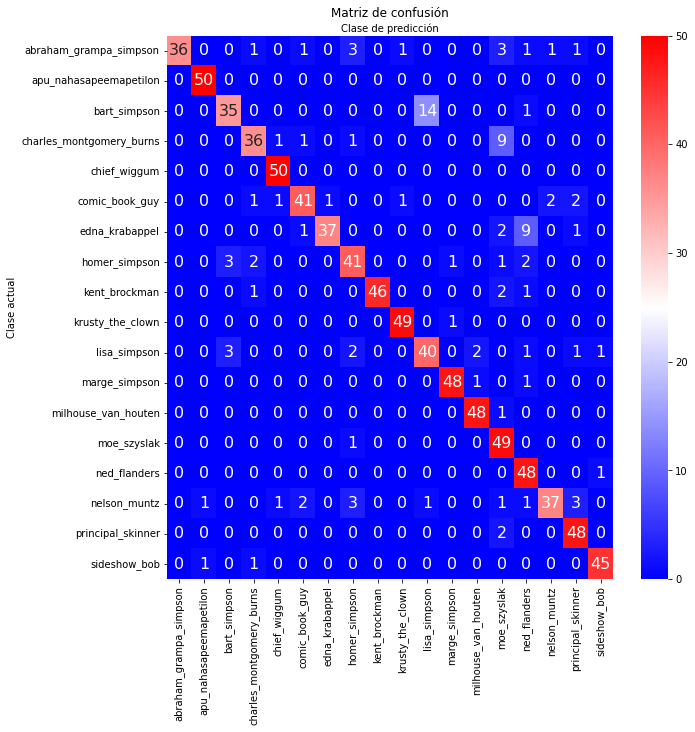

Precisión: 0.8808988764044944
Recall: 0.8808988764044944


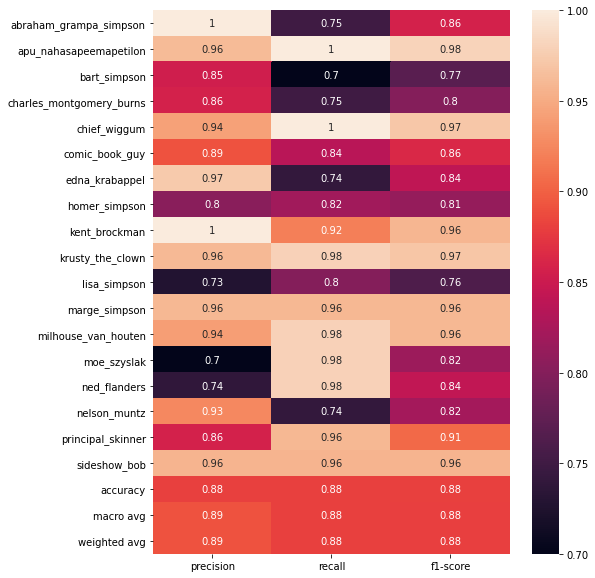

In [ ]:
model_3_2 = Sequential()
model_3_2.add(Conv2D(16, (5, 5), input_shape=(64, 64, 3)))

model_3_2.add(BatchNormalization())
model_3_2.add(Activation('relu'))

model_3_2.add(Conv2D(32, (5, 5)))
model_3_2.add(BatchNormalization())
model_3_2.add(Activation('relu'))
model_3_2.add(MaxPooling2D(pool_size=(4, 4)))

model_3_2.add(Conv2D(64, (3, 3)))
model_3_2.add(BatchNormalization())
model_3_2.add(Activation('relu'))
model_3_2.add(Dropout(0.25))


model_3_2.add(Flatten())
model_3_2.add(Dense(256))
model_3_2.add(Activation('relu'))
model_3_2.add(Dropout(0.25))
model_3_2.add(Dense(128))
model_3_2.add(Activation('relu'))
model_3_2.add(Dropout(0.25))
model_3_2.add(Dense(64))
model_3_2.add(Activation('relu'))
model_3_2.add(Dropout(0.25))
model_3_2.add(Dense(18))
model_3_2.add(Activation('softmax'))

model_3_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


print(model_3_2.summary())
history_3_2 = model_3_2.fit(X, y, epochs=20, batch_size = 64,verbose=1, validation_split = 0.2)
predicted_classes = np.argmax(model_3_2.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

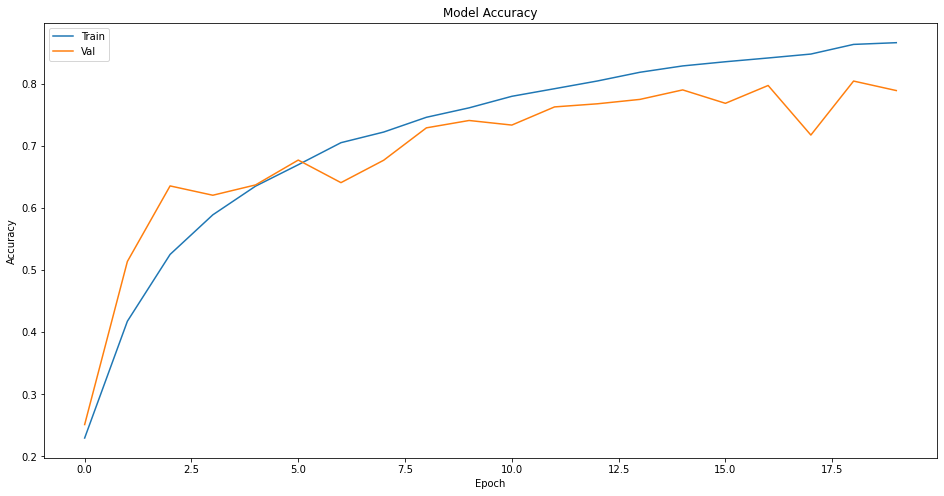

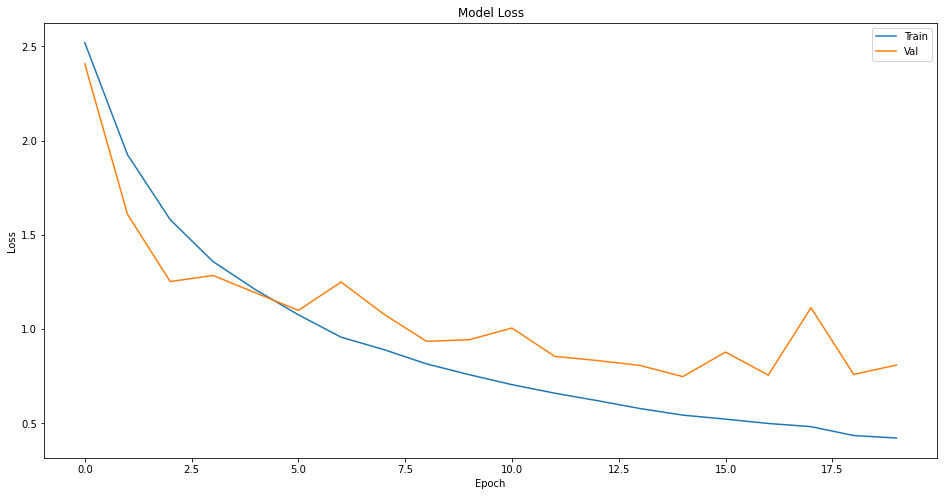

In [ ]:
plot_acc(history_3_2)
plot_loss(history_3_2)

### CNN4 - Modelo basado en paliar el overfitting de manera muy agresiva, permitiendo así un aprendizaje seguro pero muy largo

Este es el modelo (en su versión final) que a posteriori se elegirá como el modelo final.

Al igual que el resto de CNN, partimos del modelo base.

Esto lo hemos hecho así para poder tener un punto común y ganar en comparabilidad entre los diferentes modelos presentados. De esta manera, no solo podremos comparar nuestros modelos frente a un mismo modelo base, sino que podremos obtener una intuición de por qué una variante ha mejorado que la otra.

Como se puede ver, el modelo base sufre de un acentuado overfitting, llegando a un acc_train de 0.99 mientras que se estanca en un 0.76 en acc_val. Debe resaltarse que el problema del overfitting en las CNN es bien conocido ya que el elevado número de parámetros hace a estas redes neuronales propensas a dicho fenómeno.

Es por ello que en prestaremos especial atención al uso de técnicas de regularización con el fin de paliar dicho overfitting.

#### CNN4. Versión intermedia.

Tras ir probando con varios modelos, con el objetivo principal de paliar el overfitting, llegué a este modelo intermedio en el que el overfitting queda subsanado. El problema es que a raíz de todas estas medidas, la red ha perdido capacidad de aprendizaje. Probé a subir el número de epochs (ya que el overfitting ya no era un problema), pero la red no conseguía aprender.

De esta red resalto la poca diferencia que hay entre el acc_train y el acc_val

Mi objetivo ahora es ir quitando estos impedimentos a la red sin volver a caer en el overfitting.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_31 (Activation)   (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_32 (Activation)   (None, 28, 28, 64)       

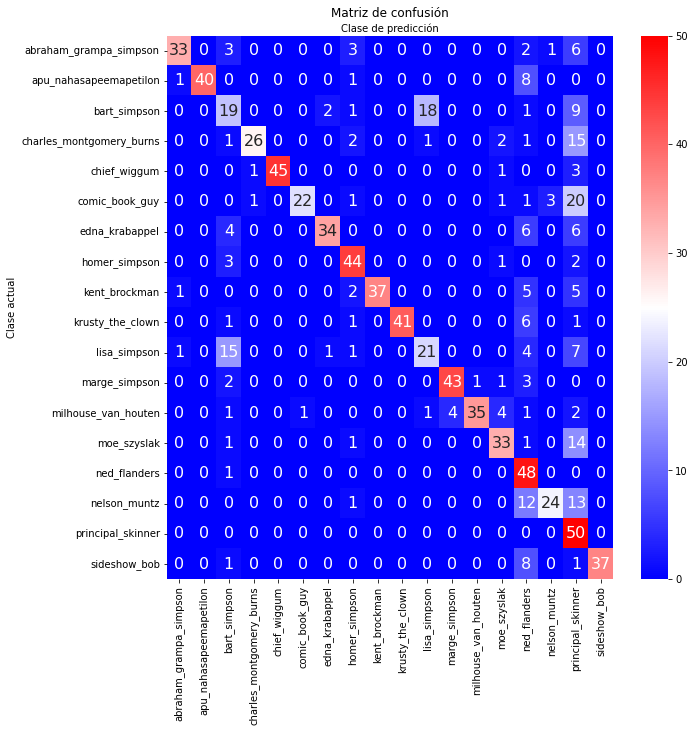

Precisión: 0.7101123595505618
Recall: 0.7101123595505618


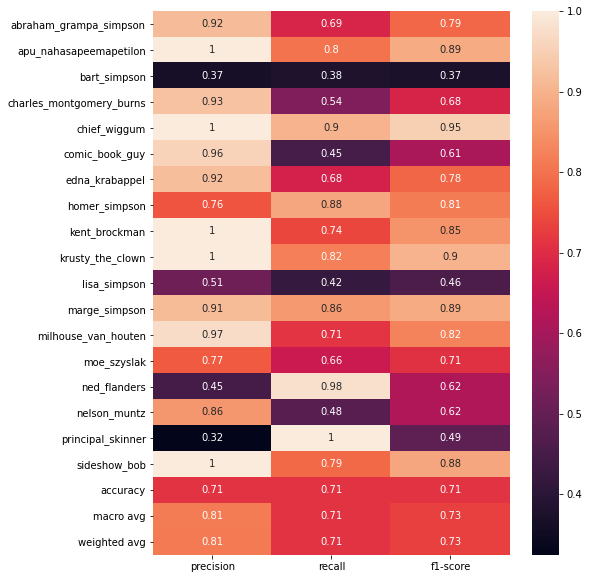

In [ ]:
model_4_1 = Sequential()

model_4_1.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model_4_1.add(Activation('relu'))
model_4_1.add(MaxPooling2D(pool_size=(2, 2)))
model_4_1.add(keras.layers.BatchNormalization()) # inspirado en AlexNet
model_4_1.add(Dropout(0.5, seed=25))

model_4_1.add(Conv2D(64, (3, 3)))
model_4_1.add(Activation('relu'))
model_4_1.add(MaxPooling2D(pool_size=(2, 2)))
model_4_1.add(keras.layers.BatchNormalization()) # inspirado en AlexNet
model_4_1.add(Dropout(0.5, seed=25))

model_4_1.add(Flatten())

model_4_1.add(Dense(128, activation = 'relu'))
model_4_1.add(Dropout(0.5, seed=25))

model_4_1.add(Dense(64, activation = 'relu'))
model_4_1.add(Dropout(0.5, seed=25))

model_4_1.add(Dense(18, activation = 'softmax'))


model_4_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


print(model_4_1.summary())
history_4_1 = model_4_1.fit(X, y, epochs=30, batch_size = 64,verbose=1, validation_split = 0.2)
predicted_classes = np.argmax(model_4_1.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

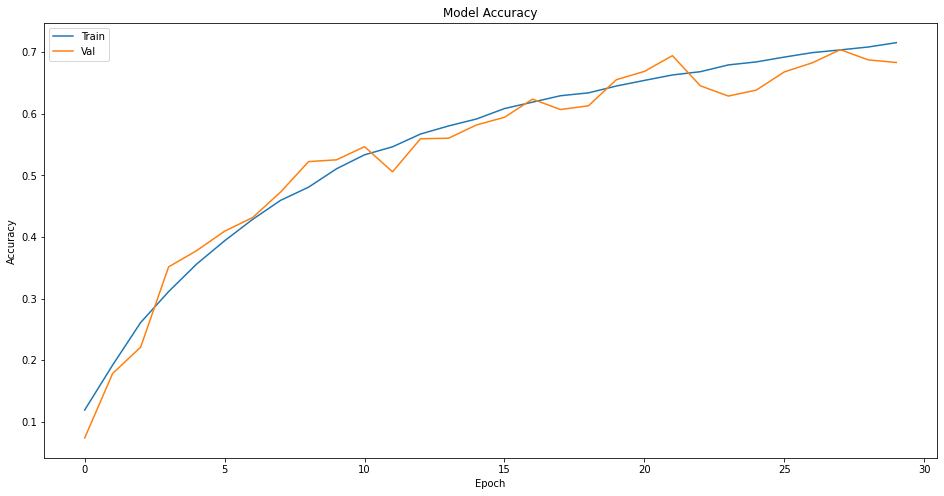

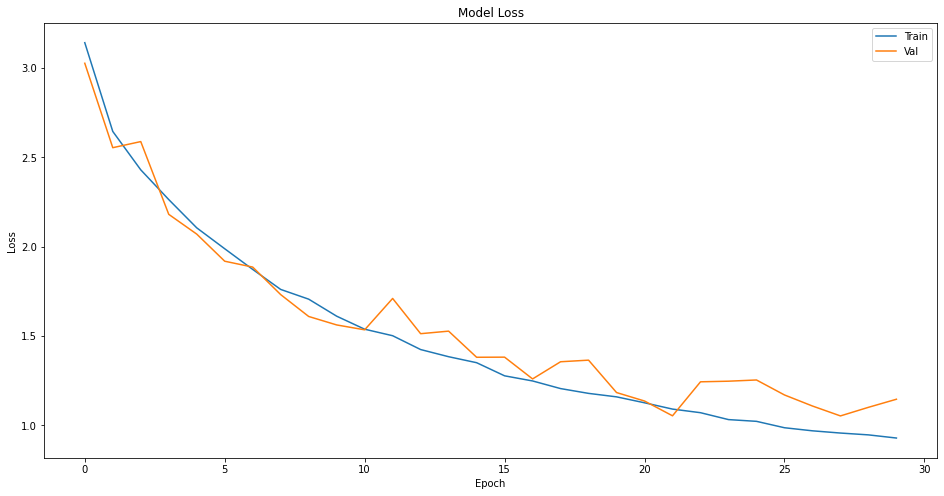

In [ ]:
plot_acc(history_4_1)
plot_loss(history_4_1)

#### CNN4. Versión final.

Partiendo de la anterior CNN intermedia, que era una capa con muchos impedimentos para el aprendizaje, propuse elevar su capacidad de aprendizaje con una tercera y cuarta capa convolucional.

Quiero resaltar el uso de las capas dropout con un % muy alto (0.5), también inspirado por AlexNet. De esta manera, estamos consiguiendo una especie de red de redes, ya que se van apagando aleatoriamente y fuerza a la red a aprender de diversas maneras.

Además, otra ventaja de usar dropout, es que en el momento de predecir, podrá usar su arquitectura a plena potencia, sin dropouts.

Finalmente gracias a la cantidad de medidas para evitar el overfitting, este nunca aparece, lo cual me permite elevar el número de epochs de manera considerable.

Si bien comencé con 20, 30 epochs, terminé probando con 150 epochs y el
resultado fue muy curioso: las medidas paliativas eran tan extrictas que el overfitting nunca llega a hacer acto de presencia.

Esto, además de verlo en el log, lo grafiqué con las funciones de utils.

Otro comentario muy curioso es el hecho de que las métricas de validación son siempre superiores a las de entrenamiento. Esperaba que las de train y validación fueran parejas, buena señal ya que estamos evitando el overfitting pero no esperaba que las de validación fueran superiores.

El punto negativo es que tarda en entrenarse casi 7 minutos, lo cual, para datasets pequeños como el de la actividad, es un tiempo a tener en cuenta.

In [ ]:
model_4_2 = Sequential()

model_4_2.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model_4_2.add(Activation('relu'))
model_4_2.add(MaxPooling2D(pool_size=(2, 2)))
model_4_2.add(keras.layers.BatchNormalization()) # inspirado en AlexNet
model_4_2.add(Dropout(0.5, seed=25))

model_4_2.add(Conv2D(64, (3, 3)))
model_4_2.add(Activation('relu'))
model_4_2.add(MaxPooling2D(pool_size=(2, 2)))
model_4_2.add(keras.layers.BatchNormalization()) # inspirado en AlexNet
model_4_2.add(Dropout(0.5, seed=25))

model_4_2.add(Conv2D(128, (3, 3)))
model_4_2.add(Activation('relu'))
model_4_2.add(MaxPooling2D(pool_size=(2, 2)))
model_4_2.add(keras.layers.BatchNormalization()) # inspirado en AlexNet
model_4_2.add(Dropout(0.5, seed=25))

model_4_2.add(Conv2D(256, (3, 3)))
model_4_2.add(Activation('relu'))
model_4_2.add(MaxPooling2D(pool_size=(2, 2)))
model_4_2.add(keras.layers.BatchNormalization()) # inspirado en AlexNet
model_4_2.add(Dropout(0.5, seed=25))

model_4_2.add(Flatten())

#model_4_2.add(keras.layers.BatchNormalization())
model_4_2.add(Dense(128, activation = 'relu'))
model_4_2.add(Dropout(0.5, seed=25))

#model_4_2.add(keras.layers.BatchNormalization())
model_4_2.add(Dense(64, activation = 'relu'))
model_4_2.add(Dropout(0.5, seed=25))

model_4_2.add(Dense(18, activation = 'softmax'))


model_4_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model_4_2.summary())


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_33 (Activation)   (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_34 (Activation)   (None, 28, 28, 64)       

Epoch 1/150
238/238 [==============================] - 5s 15ms/step - loss: 3.7344 - accuracy: 0.0762 - val_loss: 2.8353 - val_accuracy: 0.1161
Epoch 2/150
238/238 [==============================] - 3s 14ms/step - loss: 2.7466 - accuracy: 0.1548 - val_loss: 2.7378 - val_accuracy: 0.1371
Epoch 3/150
238/238 [==============================] - 3s 14ms/step - loss: 2.5997 - accuracy: 0.1927 - val_loss: 2.4179 - val_accuracy: 0.2451
Epoch 4/150
238/238 [==============================] - 3s 14ms/step - loss: 2.4392 - accuracy: 0.2408 - val_loss: 2.3067 - val_accuracy: 0.2719
Epoch 5/150
238/238 [==============================] - 3s 14ms/step - loss: 2.3033 - accuracy: 0.2764 - val_loss: 2.0872 - val_accuracy: 0.3409
Epoch 6/150
238/238 [==============================] - 3s 14ms/step - loss: 2.1664 - accuracy: 0.3238 - val_loss: 1.9717 - val_accuracy: 0.3801
Epoch 7/150
238/238 [==============================] - 3s 14ms/step - loss: 2.0593 - accuracy: 0.3606 - val_loss: 1.9188 - val_accuracy:

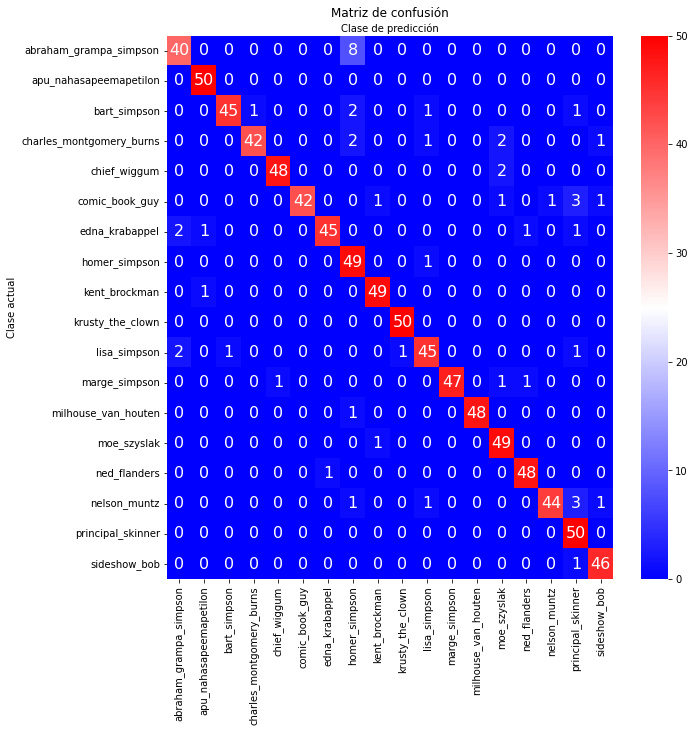

Precisión: 0.9404494382022472
Recall: 0.9404494382022472


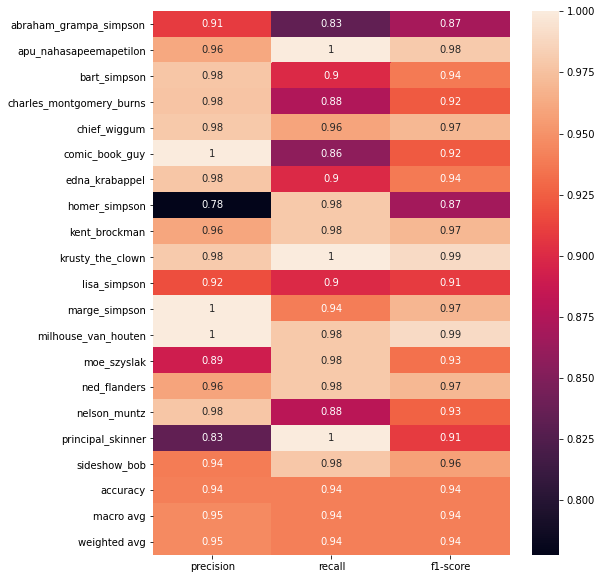

In [ ]:
history_4_2 = model_4_2.fit(X, y, epochs=150, batch_size = 64,verbose=1, validation_split = 0.2)
predicted_classes = np.argmax(model_4_2.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

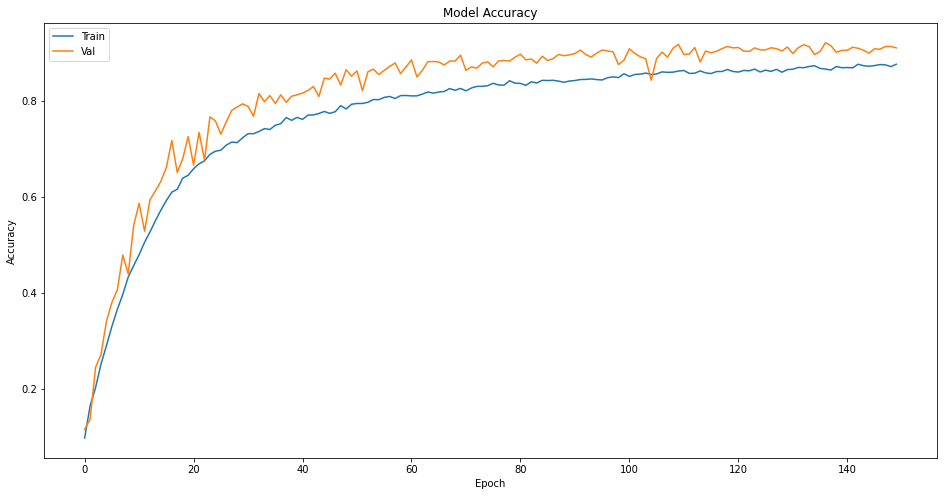

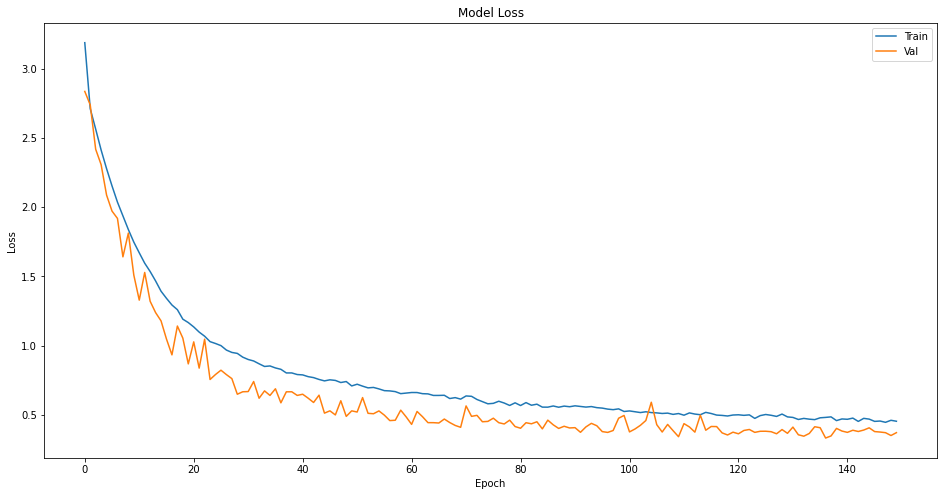

In [ ]:
plot_acc(history_4_2)
plot_loss(history_4_2)

In [ ]:
model_4_2.evaluate(X_t, y_t)

28/28 [==============================] - 0s 5ms/step - loss: 0.2036 - accuracy: 0.9404


[0.20362511277198792, 0.9404494166374207]

### Comparación de las cuatro CNN

En esta sección compararemos los cuatro modelos además de predecir con el mejor de los modelos en el conjunto de test.

El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.



Comparación de los 4 de los modelos.

En primer lugar, se ha experimentado con un primer modelo (modelo_1_1) igual que el base model pero sin las capas de max pooling. Debido a que se han eliminado estas capas cuya funcionalidad es la reducción de la dimensionalidad antes de llegar a las capas Dense (con lo cual la capa flatten es mucho mayor), se ha observado un overfitting muy acentuado, seguramente debido al gran número de parámetros a entrenar (concretamente 27,588,370 en modelo sin max pooling) en comparación con el base model que hemos escogido como modelo estándar que solo tiene 1,636,114 parámetros. 
Para solvetar esta situación se han reducido el número de capas Dense (modelo_1_2) y se han añadido capas de Dropout a la par que se ha añadido otra capa mas de convolución para ver si el comportamiento era diferente. No obstante no se ha conseguido solventar el overfitting. 

Por otro lado, se ha añadido un modelo más simple (model_2) se han reducido el número de capas tanto de convolución como Dense para ver si simplificando el modelo base, este podía aprender de la misma manera y llegar al mismo nivel de accuracy. No obstante, al simplificar tanto la arquitectura no se ha conseguido superar el 70% de accuracy. Suponemos que esto es debido a que al no tener suficientes capas de convolución no es capaz de capturar todas las features necesarias de las imágenes para poder realizar un correcto aprendizaje. 

En la tercera experimentación (model_3_1 y model_3_2), se ha partido del modelo base y se han comparado dos técnicas de regularización, por un lado, Batch normalization, por un lado, y por otro lado Dropout para tratar de reducir el overfitting. Como se puede observar, la primera técnica resulta ineficaz en la reducción del overfitting, a diferencia del Dropout que si que ha provocado una reducción considerable del mismo, y además, una mayor capacidad de aprendizaje. 


Por último, con ánimo de aumentar la capacidad predictiva al máximo (model_4_1 y model_4_2), por un lado, se han añadido más capas de convolución para que el modelo fuera capaz de capturar todas las características de las imágenes. Asímismo para evitar el overfitting se ha añadido un dropout considerable de 0.5, inspirado por AlexNet y consiguiendo una especie de red de redes que se van apagando aleatoriamente y forzando a la red a aprender de diversas maneras. Al no aparecer el overfitting, esto ha permitido elevar el número de epoch considerablemente y por lo tanto llegar a un accuracy muy alto superior al 94%.

Así pues, de la comparación de todos los modelos, podemos deducir que la mejor estrategia es hacer una arquitectura suficientemente compleja con diversas capas de convolución para poder capturar todas las características así como añadir un fuerte Dropout para poder reducir el overfitting al máximo, aumentando así el número de epoch para que el modelo pueda aprender de manera óptima. 

Finalmente, presentamos aquí los resultados de nuestra CNN final frente al conjunto de test (el cual, el modelo, no había llegado a ver nunca).

## Detección de las clases más problemáticas

Dentro de los resultados de los modelos construidos, se ha podido apreciar que la mayoría de ellos tienen dificultades en la clasificación de las mismas clases. En su mayoría, dichas clases que se confunden son las siguientes:

* Abraham Grandpa Simpson con Homer Simpson

<center>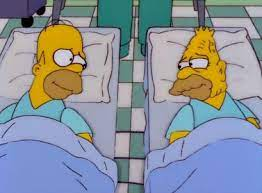</center>

* Lisa Simpson con Bart Simpson

<center><img src="https://lh3.googleusercontent.com/proxy/5gfbmf7zgfTOZKzcgpBwJJfj8ldKtY_O6OlO4uE-T0MFCNIIgHSuwhWixhBgvUwgriSFxVFjmb0GKb7B7EExbp_hupSFu8sf8R0OnqT9atS3J3S1sIjCpIgFjrQgBXCTxx5DqRxBVHp8Db0g3LG7WU4JoJDvl9p4pw" height="300px"></center>

* Nelson Muntz con Ned Flanders

<center><img src="https://i.ytimg.com/vi/41fDDdgL6GI/hqdefault.jpg"></center>


Como se puede apreciar en las imágenes de arriba, son personajes que tienen cierto parecido. Entre ellos, destaca principalmente la dificultad de la mayoría de las redes al distinguir a Lisa de Bart y a Abraham de Homer, y eso se puede deber a diferentes motivos, entre ellos el parecido de las formas y los colores.

El modelo final elegido corrige prácticamente en su totalidad el problema en la clasificación de Lisa, pero no subsana el problema en la clasificación de Abraham.

A continuación volvemos a graficar tanto las matrices de confusion como las tablas de precisión y recall de todas las clases.

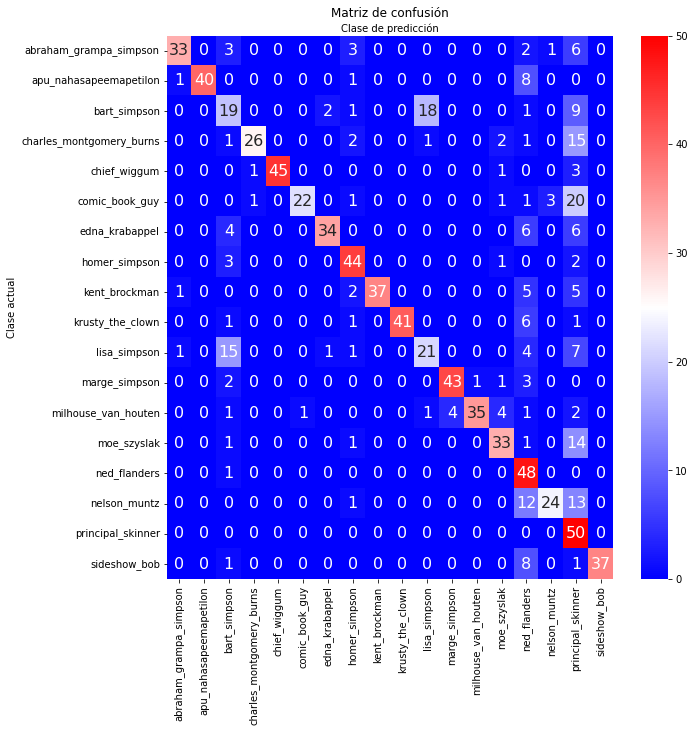

Precisión: 0.7101123595505618
Recall: 0.7101123595505618


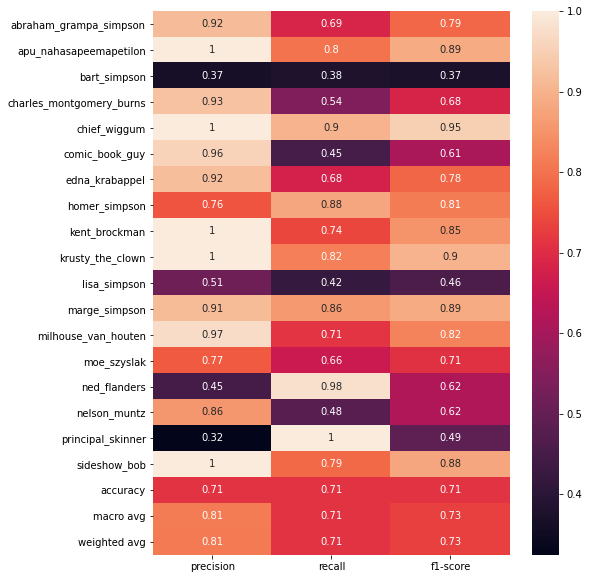

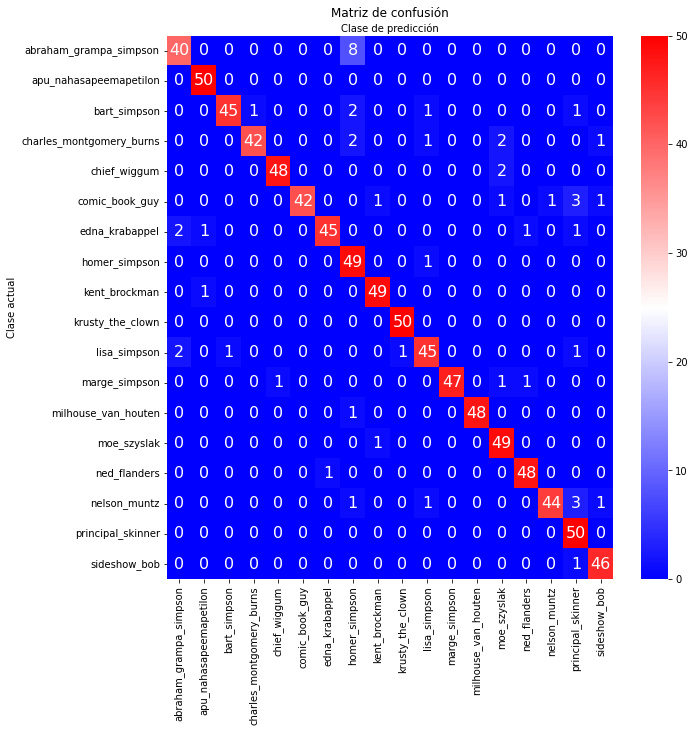

Precisión: 0.9404494382022472
Recall: 0.9404494382022472


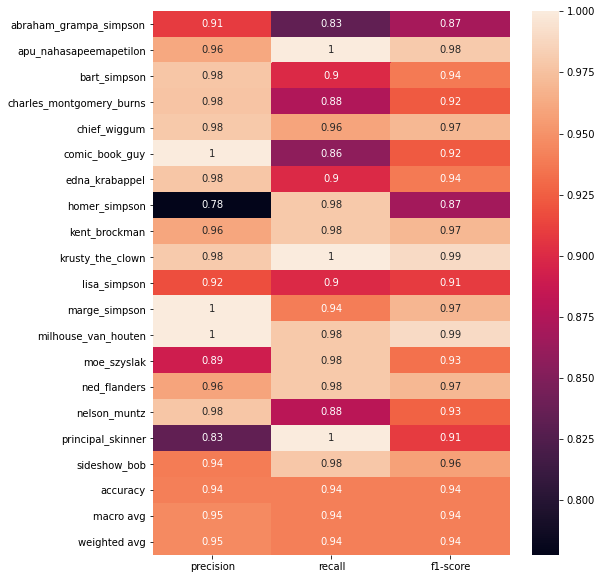

In [ ]:
predicted_classes = np.argmax(model_4_1.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)


predicted_classes = np.argmax(model_4_2.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

## Comparación de un modelo CNN con un modelo Fully Connected
En esta sección comparamos el mejor de los modelos CNN obtenidos con un modelo Fully connected.

Para diseñar el modelo Fully Connected, se ha partido del hecho de que en el análisis de los modelos CNN se ha observado la necesidad de crear modelos con un un cierto tamaño para obtener un mayor rendimiento. Por este motivo, inicialmente se ha probado a crear modelos con unas cuantas capas y técnicas de regularización. Uno de los modelos que mejores resultados ha obtenido ha sido el que aparece a continuación, pero, como se puede apreciar, a pesar de no caer en overfitting, tiene una accuracy por debajo del 50%.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               6291968   
_________________________________________________________________
activation_37 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_38 (Activation)   (None, 256)              

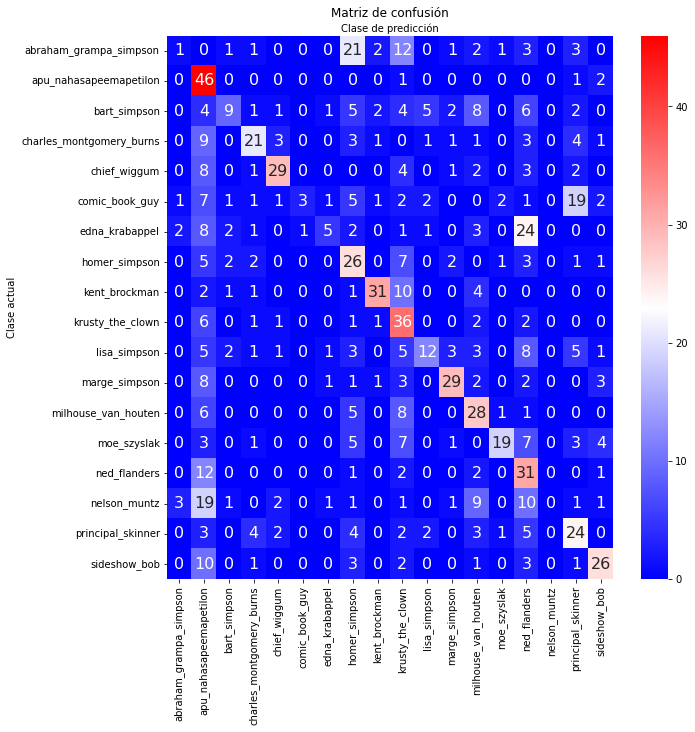

Precisión: 0.42247191011235957
Recall: 0.42247191011235957


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


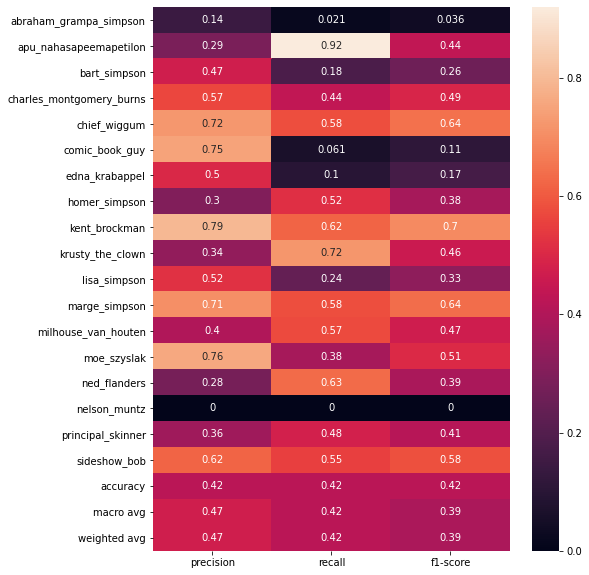

In [ ]:
from keras import optimizers

model_5_1= Sequential()
model_5_1.add(Flatten(input_shape=X.shape[1:]))

model_5_1.add(Dense(512))
model_5_1.add(Activation("relu"))
model_5_1.add(BatchNormalization())
model_5_1.add(Dropout(0.5))

model_5_1.add(Dense(256))
model_5_1.add(Activation("relu"))
model_5_1.add(Dropout(0.3))

model_5_1.add(Dense(128))
model_5_1.add(Activation("relu"))
model_5_1.add(BatchNormalization())
model_5_1.add(Dropout(0.3))

model_5_1.add(Dense(64))
model_5_1.add(Activation("relu"))
model_5_1.add(Dropout(0.25))

model_5_1.add(Dense(18))
model_5_1.add(Activation('softmax'))
model_5_1.summary()

model_5_1.compile(loss="categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])


print(model_5_1.summary())
history_5_1 = model_5_1.fit(X, y, epochs=20, batch_size = 64,verbose=1, validation_split = 0.2)
predicted_classes = np.argmax(model_5_1.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

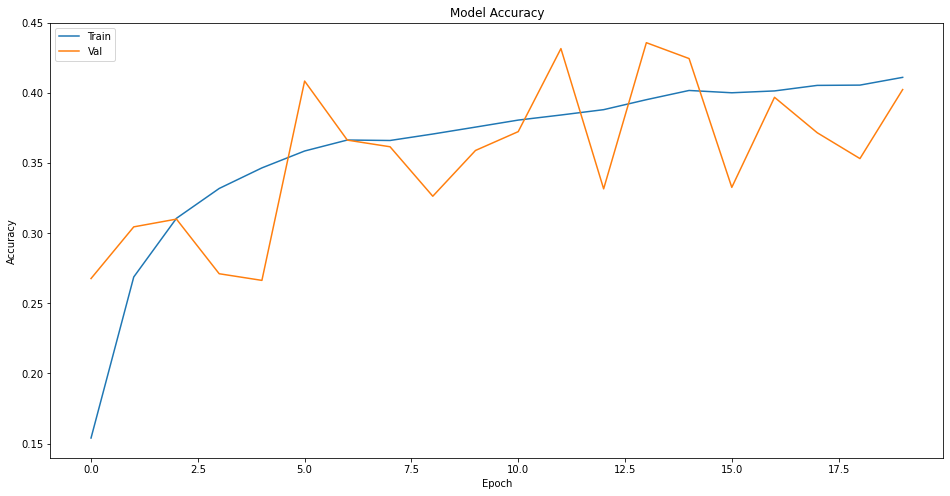

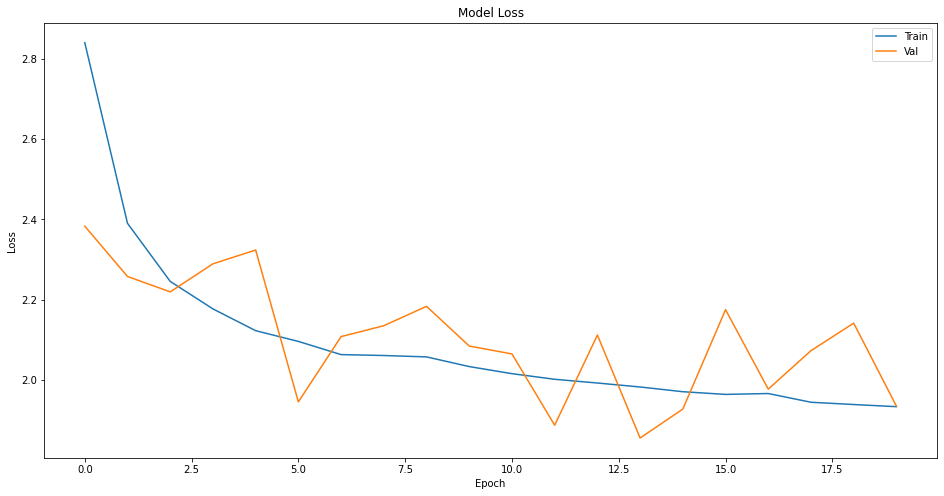

In [ ]:
plot_acc(history_5_1)
plot_loss(history_5_1)

Finalmente, tras varias pruebas, se ha encontrado que uno de los modelos Fully Connected que mejor se ha adecuado a este conjunto de datos ha sido uno con 3 capas densas y sin ninguna técnica de regularización. A pesar de que se ha probado a añadir este tipo de técnicas, no se han podido implementar con éxito puesto que el modelo, partiendo de una capacidad predictiva prácticamente nula, perdía aun más capacidad de aprendizaje. El modelo es el siguiente:

Epoch 1/30
238/238 [==============================] - 2s 6ms/step - loss: 3.0188 - accuracy: 0.1448 - val_loss: 2.3226 - val_accuracy: 0.2795
Epoch 2/30
238/238 [==============================] - 1s 5ms/step - loss: 2.2419 - accuracy: 0.3036 - val_loss: 2.2462 - val_accuracy: 0.3196
Epoch 3/30
238/238 [==============================] - 1s 5ms/step - loss: 2.0708 - accuracy: 0.3682 - val_loss: 2.1396 - val_accuracy: 0.3551
Epoch 4/30
238/238 [==============================] - 1s 5ms/step - loss: 1.9548 - accuracy: 0.4059 - val_loss: 2.1130 - val_accuracy: 0.3664
Epoch 5/30
238/238 [==============================] - 1s 5ms/step - loss: 1.8514 - accuracy: 0.4425 - val_loss: 2.0254 - val_accuracy: 0.3938
Epoch 6/30
238/238 [==============================] - 1s 5ms/step - loss: 1.8101 - accuracy: 0.4527 - val_loss: 1.9574 - val_accuracy: 0.4188
Epoch 7/30
238/238 [==============================] - 1s 5ms/step - loss: 1.7142 - accuracy: 0.4800 - val_loss: 1.8595 - val_accuracy: 0.4470
Epoch 

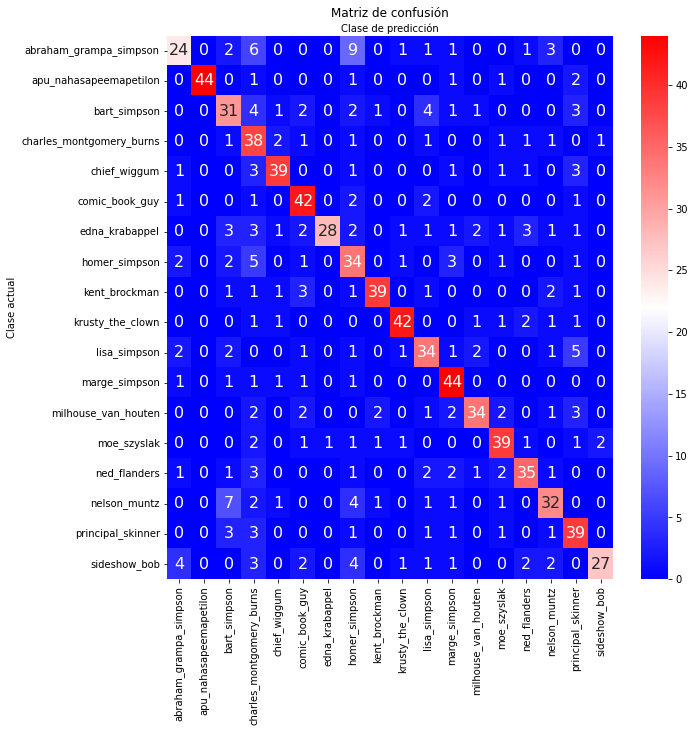

Precisión: 0.7247191011235955
Recall: 0.7247191011235955


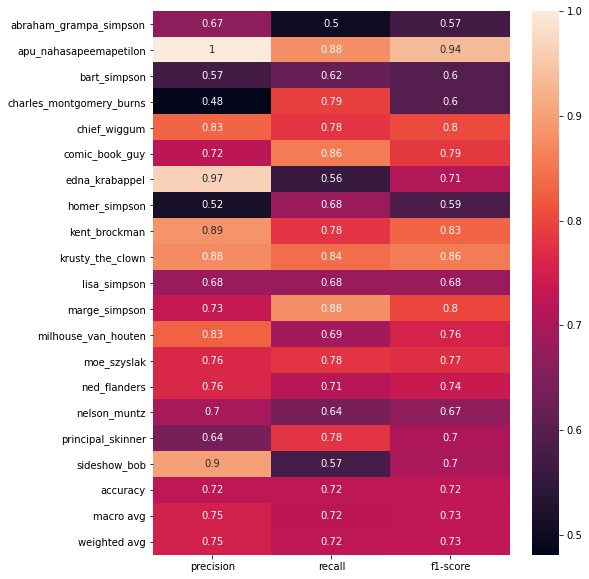

In [ ]:
model_5_2 = Sequential()
model_5_2.add(Flatten(input_shape=X.shape[1:])) 
model_5_2.add(Dense(128, activation='relu'))
model_5_2.add(Dense(64, activation='relu'))
model_5_2.add(Dense(18, activation='softmax'))

model_5_2.compile(loss="categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])

history_5_2 = model_5_2.fit(X, y, epochs=30, batch_size = 64, verbose=1, validation_split = 0.2)


print(model_5_2.summary())
history_5_2 = model_5_2.fit(X, y, epochs=30, batch_size = 64,verbose=1, validation_split = 0.2)
predicted_classes = np.argmax(model_5_2.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

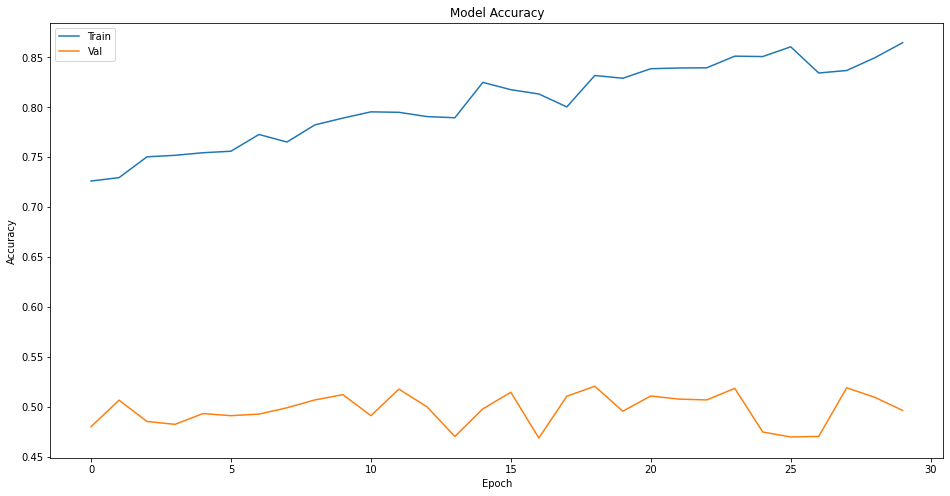

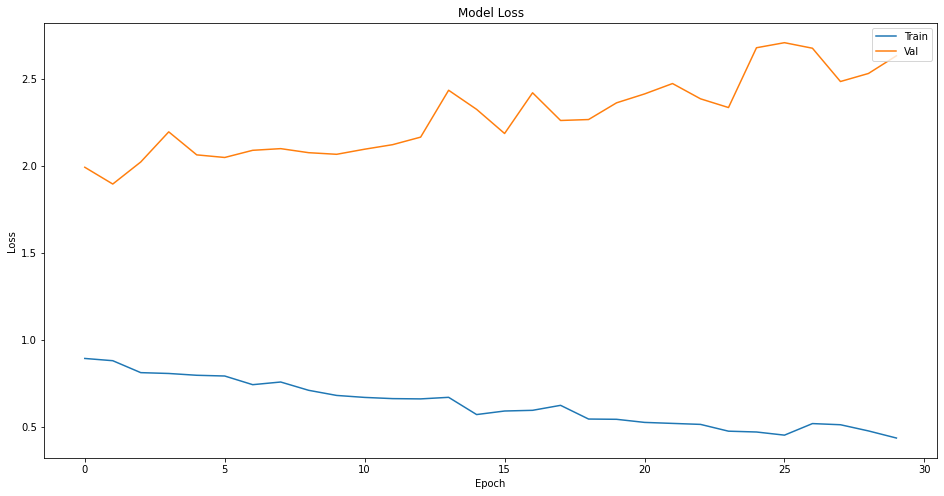

In [ ]:
plot_acc(history_5_2)
plot_loss(history_5_2)

Por consiguiente, como se ha podido observar, los modelos Fully Connected no son capaces de adaptarse a la complejidad del problema a resolver. Todos los modelos probados han tenido una pérdida bastante alta, y una accuracy que prácticamente en ningún caso superaba el 50%.

No obstante, en los modelos CNN analizados, se puede apreciar que esa capacidad de aprendizaje es mucho mayor que en los Fully Connected, demostrando en el mejor de los modelos construidos una gran capacidad predictiva para el conjunto de datos con el que se está trabajando.

Si comparamos los resultados de la Fully Connected 5_2 y la CNN 4, observamos que tanto la accuracy como loss no tienen una convergencia clara y los resultados de train y validation son muy dispares, mientras que en la CNN llegan a converger y los resultados de train y validation son similares.

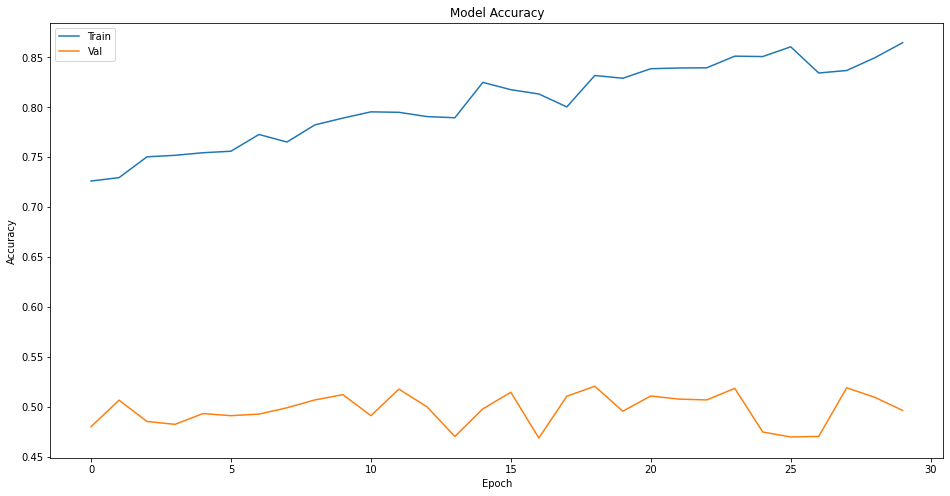

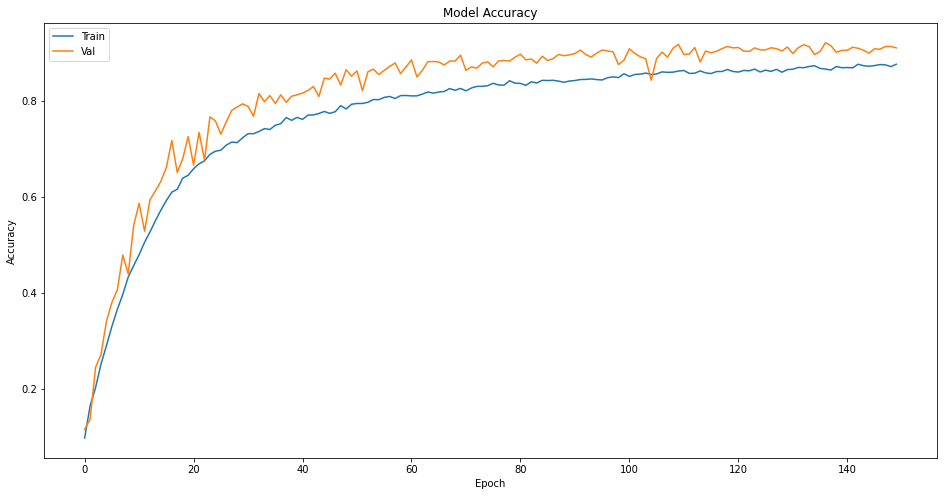

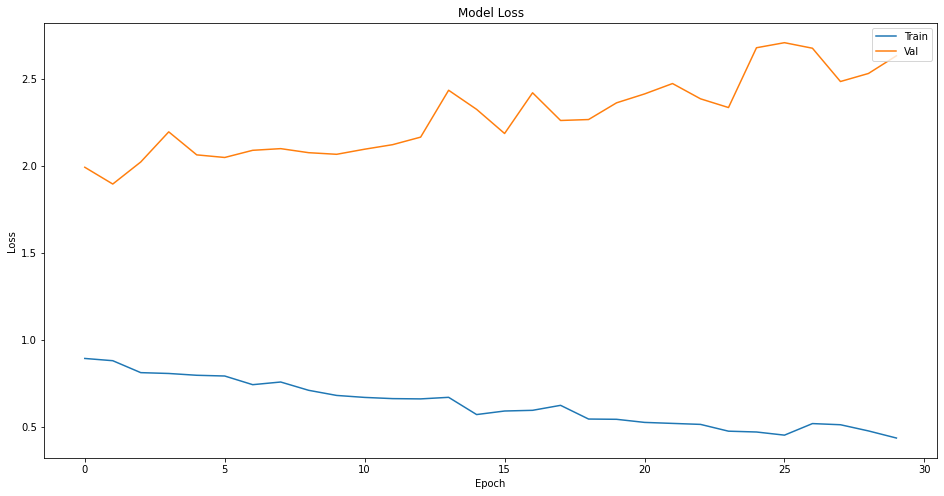

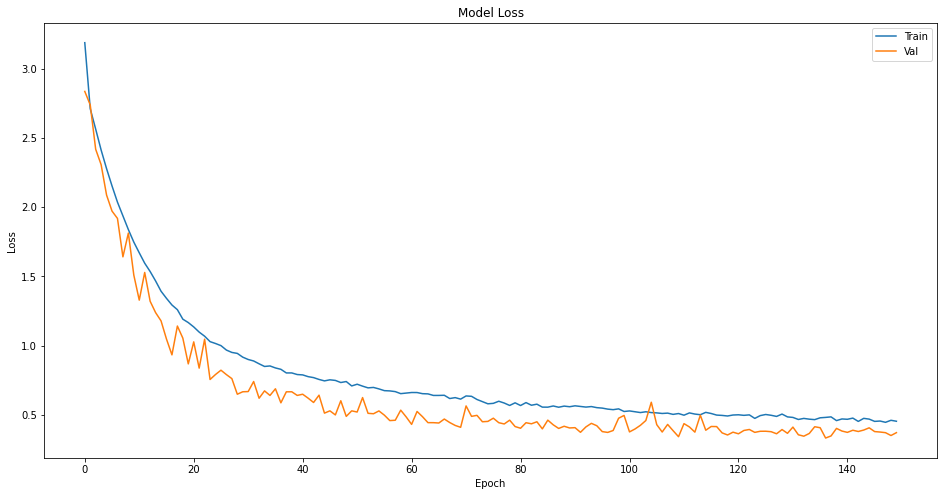

In [ ]:
plot_acc(history_5_2)
plot_acc(history_4_2)
plot_loss(history_5_2)
plot_loss(history_4_2)

En cuanto a las matrices de confusión, se observa que las clases más problemáticas siguen siendo las mismas comentadas en el apartado anterior, pero en la Fully Connected confunde a Nelson Muntz con Moe Szyslak.

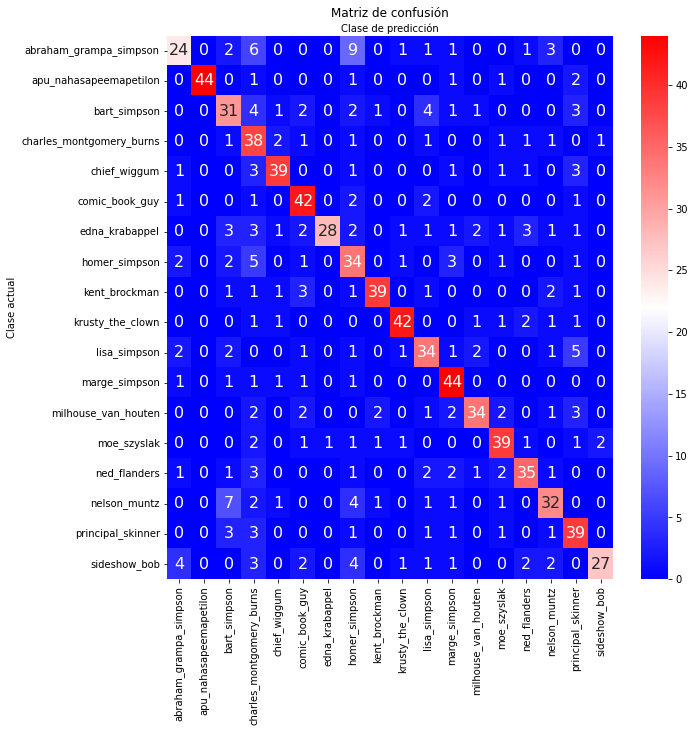

Precisión: 0.7247191011235955
Recall: 0.7247191011235955


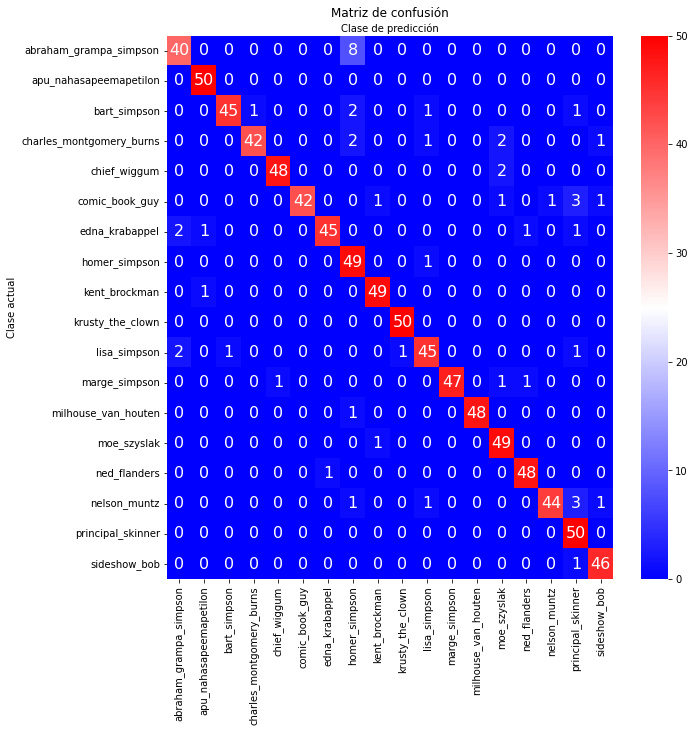

Precisión: 0.9404494382022472
Recall: 0.9404494382022472


(0.9404494382022472, 0.9404494382022472)

In [ ]:
predicted_classes = np.argmax(model_5_2.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
predicted_classes = np.argmax(model_4_2.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)

Si observamos las métricas obtenidas para cada clase en particular, observamos que en el caso de la Fully Connected la mayoría de los valores se situan por debajo del 0.85 mientras que en la CNN la mayoría de las métricas están situadas por encima del 0.90, lo que indica que el modelo es muy robusto.

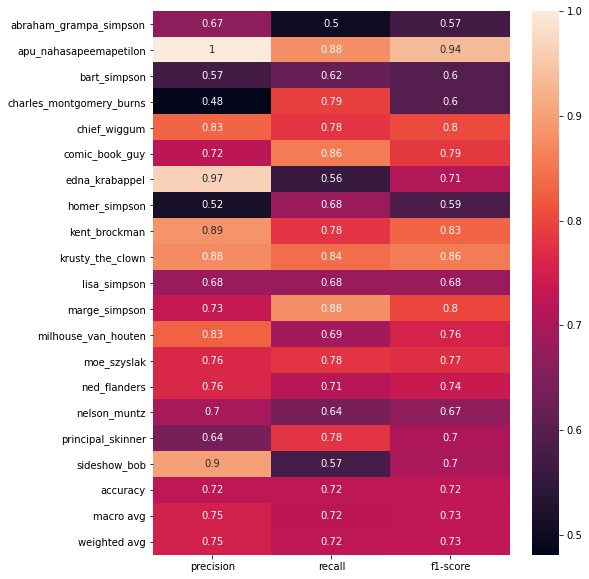

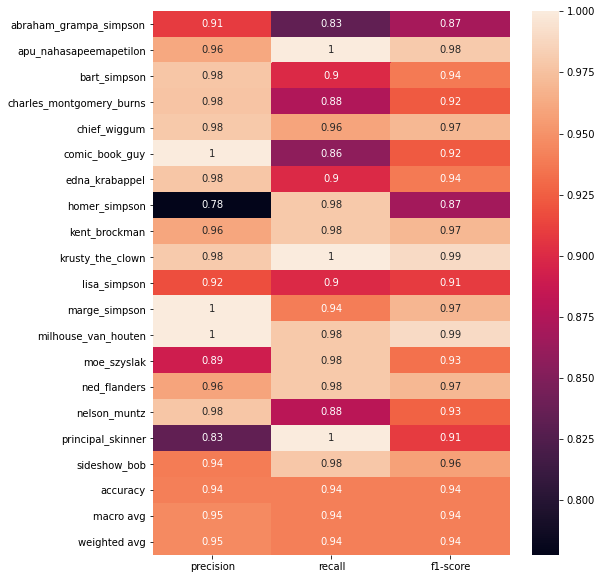

In [ ]:

predicted_classes = np.argmax(model_5_2.predict(X_t), axis = 1)
plot_confusion_matrix(y_t_escalar, predicted_classes)
predicted_classes = np.argmax(model_4_2.predict(X_t), axis = 1)
plot_confusion_matrix(y_t_escalar, predicted_classes)

## Implementación del Data Augmentation
En esta sección implementamos la técnica del data augmentation al modelo con mejor rendimiento.

Además, comparamos la mejora que esto conlleva así como la comparación entre diversas formas de aplicar el data augmentation.

Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

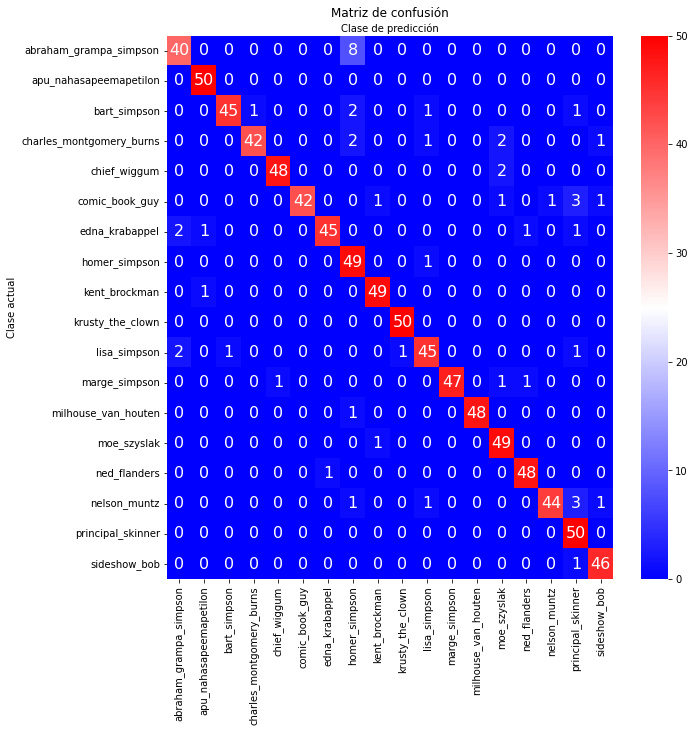

Precisión: 0.9404494382022472
Recall: 0.9404494382022472


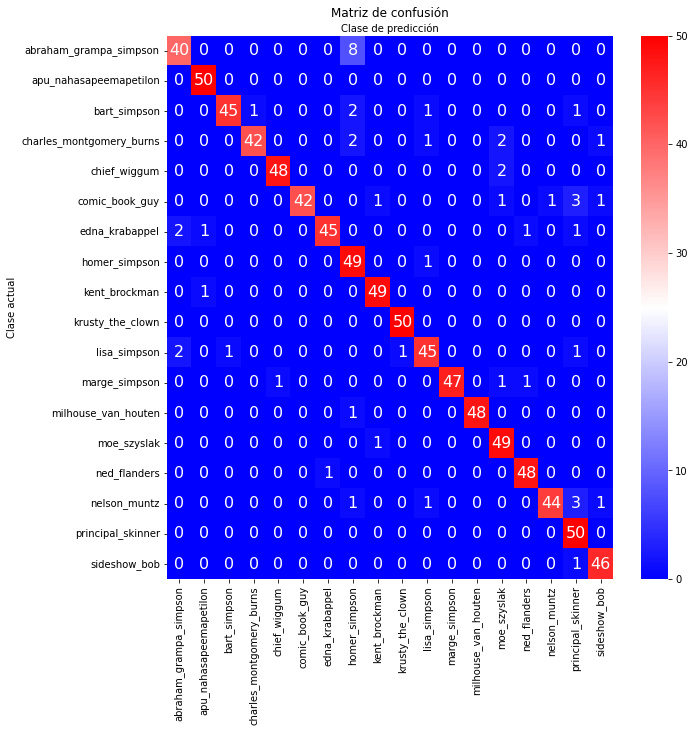

Precisión: 0.9404494382022472
Recall: 0.9404494382022472


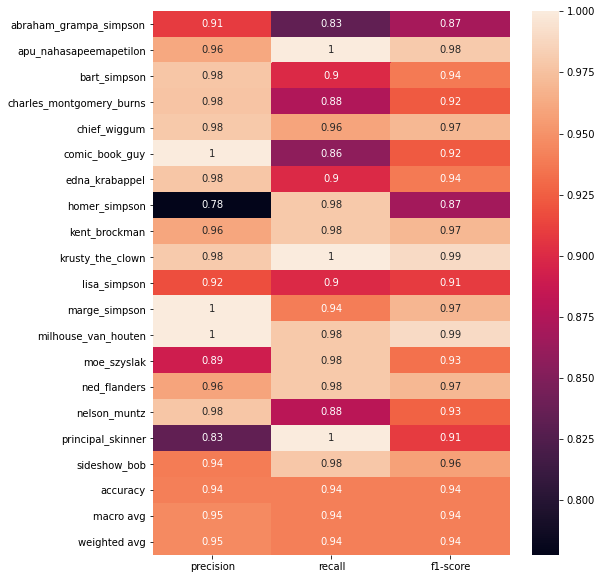

In [ ]:
# El modelo CNN final se encuentra cargado en la variable modelo_final
modelo_final = model_4_2
history_final = history_4_2

#Recordemos que sus métricas de evaluación eran las siguientes
predicted_classes = np.argmax(modelo_final.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)


predicted_classes = np.argmax(modelo_final.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

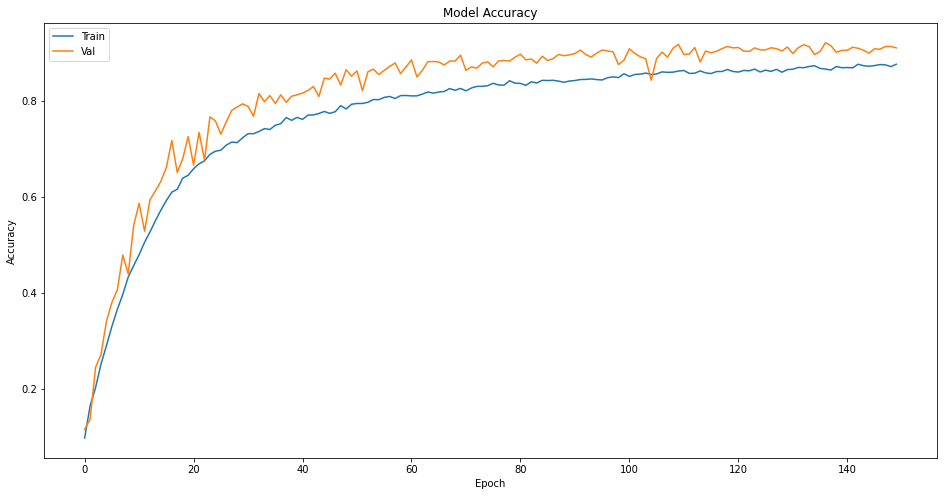

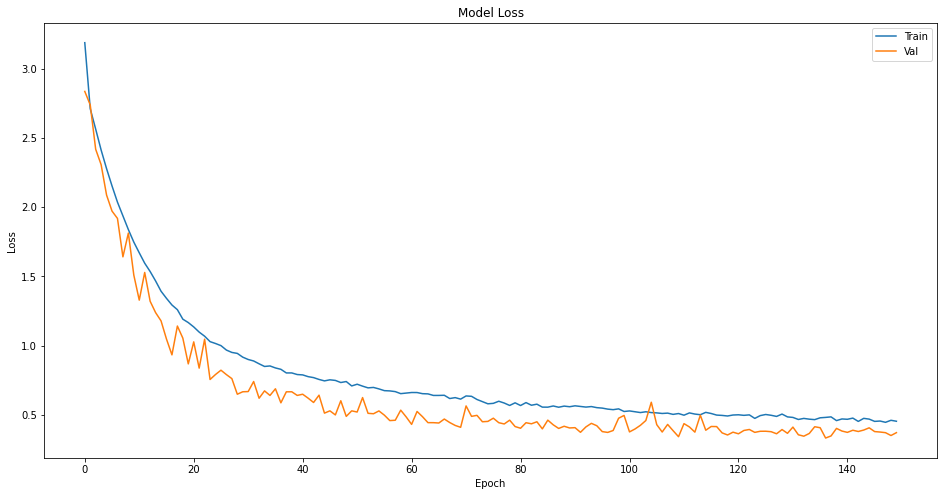

In [ ]:
plot_acc(history_final)
plot_loss(history_final)

Vamos ahora a enriquecer nuestros datos de entrenamiento usando la técnica de data augmentation y ver si nuestra mejor CNN se aprovecha del incremento en la cantidad de datos de entrenamiento.

En la aplicación de la técnica data augmentation, se han realizado pequeñas perturbaciones sobre las imágenes de manera que obtenemos nuevas imágenes con las que entrenar. Las perturbaciones que se han realizado son las siguientes:
* Angulo de corte en el sentido antihorario, en grados
* Rango del zoom aleatorio
* Rango de desplazamiento en anchura
* Rango de desplazamiento en altura
* Los puntos fuera de los límites se rellenan con el valor del vecino más cercano
* Se voltean las entradas, de forma aleatoria, horizontalmente


In [ ]:
datagen = ImageDataGenerator(
    shear_range=0.2,
    rotation_range = 180,
    fill_mode = 'nearest',
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2)

datagen.fit(X)

In [ ]:
model_DA = modelo_final

history_DA = model_DA.fit(datagen.flow(X, y, batch_size = 64, subset = 'training'),
                          epochs=150,
                          verbose = 1,
                          validation_data = datagen.flow(X, y, batch_size=64, subset='validation'))

Epoch 1/150
238/238 [==============================] - 20s 81ms/step - loss: 2.1991 - accuracy: 0.3924 - val_loss: 1.7115 - val_accuracy: 0.4966
Epoch 2/150
238/238 [==============================] - 19s 78ms/step - loss: 1.9651 - accuracy: 0.4339 - val_loss: 1.5635 - val_accuracy: 0.5408
Epoch 3/150
238/238 [==============================] - 19s 79ms/step - loss: 1.8621 - accuracy: 0.4650 - val_loss: 1.5155 - val_accuracy: 0.5463
Epoch 4/150
238/238 [==============================] - 19s 79ms/step - loss: 1.8038 - accuracy: 0.4798 - val_loss: 1.4891 - val_accuracy: 0.5706
Epoch 5/150
238/238 [==============================] - 19s 79ms/step - loss: 1.7385 - accuracy: 0.5001 - val_loss: 1.4278 - val_accuracy: 0.5885
Epoch 6/150
238/238 [==============================] - 19s 79ms/step - loss: 1.7003 - accuracy: 0.5088 - val_loss: 1.4409 - val_accuracy: 0.5795
Epoch 7/150
238/238 [==============================] - 19s 78ms/step - loss: 1.6817 - accuracy: 0.5159 - val_loss: 1.3196 - val_ac

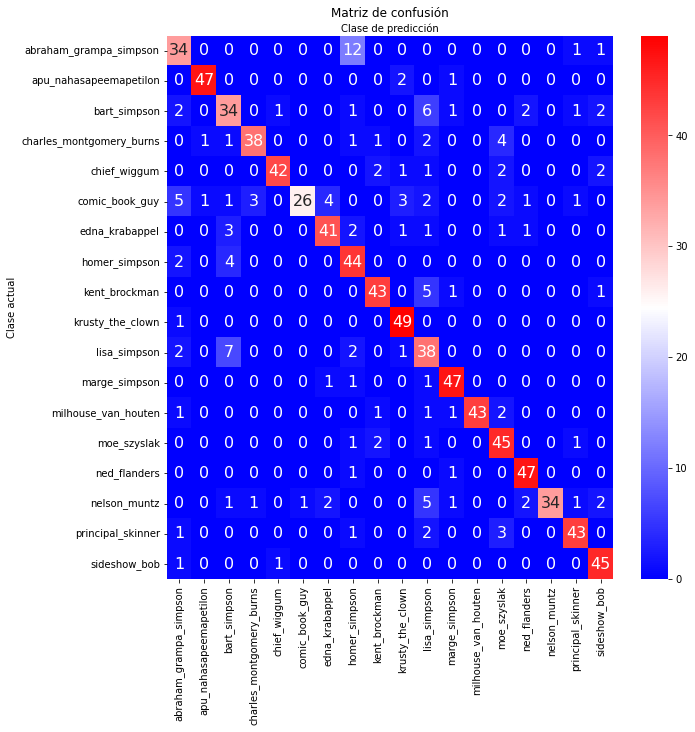

Precisión: 0.8314606741573034
Recall: 0.8314606741573034


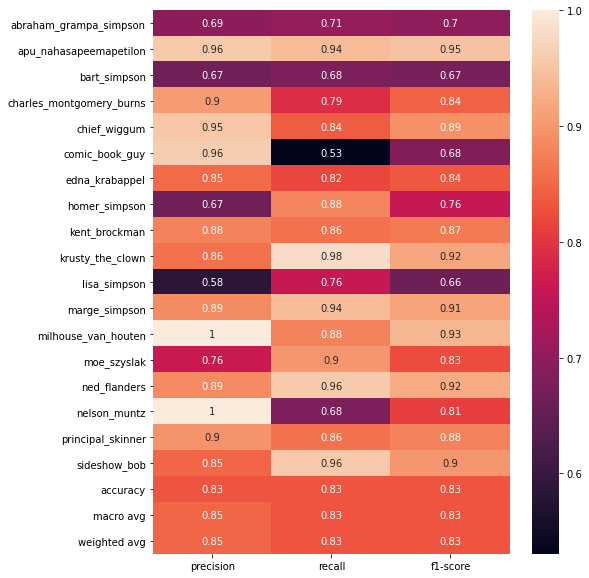

In [ ]:
predicted_classes = np.argmax(model_DA.predict(X_t), axis = 1)
calcular_metricas_cat(y_t_escalar, predicted_classes)
plot_confusion_matrix(y_t_escalar, predicted_classes)

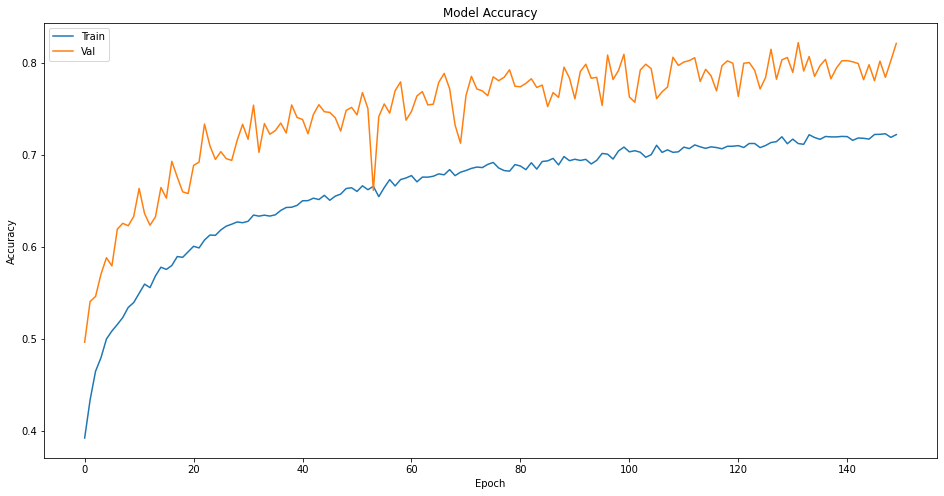

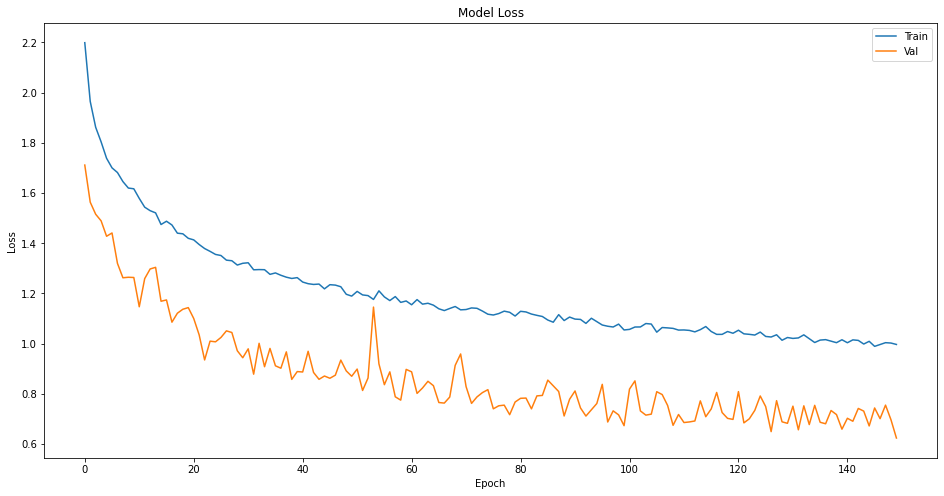

In [ ]:
plot_acc(history_DA)
plot_loss(history_DA)

Conclusiones de Data Augmentation.

En este caso particular, esta técnica no ha arrojado buenos resultados, bajando el accuracy de un 0.94 a menos de 0.85.

Además, ha tardado más de 50 minutos en ejecutarse, cuando el modelo sin Data Augmentation tardaba a apenas 7 minutos.

## Conclusiones final

A lo largo del trabajo se ha podido apreciar que uno de los problemas principales en el desarrollo de modelos CNN ha sido el overfitting. Éste ha aparecido en la mayoría de los modelos que se han diseñado, y para hacerlo desaparecer han sido necesarias, entre otras técnicas, múltiples capas dropout junto a capas maxpooling (estas últimas para reducir el número de parámetros al juntar la parte convolucional con la parte de las Fully Connected). Es decir, la aplicación de técnicas de regularización por si solas no han sido suficientes para evitar el overfitting.

En la comparación de las CNN con las Fully Connected, se ha dejado en evidencia que las CNN son el modelo adecuado para resolver este tipo de clasificación. Las Fully Connected que se han probado no han sido capaces de llevar a cabo el proceso de aprendizaje necesario para proporcionar resultados aceptables.

Por otro lado, se ha podido observar que la mayoría de las redes han fallado en la clasificación de los mismos personajes. Por ese motivo, se ha hecho un análisis de las imágenes que contenían esas clases concretas, pero no se ha llegado a ninguna conclusión concreta.

En cuanto al data augmentation, esta técnica suele ser de ayuda para mejorar la capacidad predictiva de los modelos y también suele implicar una cierta regularización que ayuda a evitar el posible overfitting. Al aplicar data augmentation al modelo final, en cambio, se ha podido observar que no se ha obtenido ninguna mejoría, habiendo ocurrido todo lo contrario: el modelo de por sí bueno, ha empeorado notablemente su rendimiento.